# <center>TELCO CUSTOMER CHURN PREDICTION</center>

## The Telco customer churn prediction is a supervised Machine Learning model system that will predict classes of customers that will churn from the telecommunication subscriptions. We are going to try three algorithms namely XGBoost Classifier, RandomForest Classifier and the Logistic Regression. Applying these three classifiers would enable us to determine which model would be able to provide (i) good accuracy, (ii) Recall - sensitivity, (ii) Precision in terms of specificity (iii) F1 score and (iv) ROC AUC. The outcome would be the best customer churn predictor for the investigation.
## The data source is from kaggle:https://www.kaggle.com/blastchar/telco-customer-churn. It has about 7043 rows with 21 columns. The nature of the dataset is a mixture of categorical and continous variables. Records have shown that most custormers jump ship as a result of bad experience or for a better deal. In essence good corporations focus on process improvement and deploying a model to score end-of term churn risk. In order words, every bad experience exposes the company to an incremental risk of cancellation in future.

In [1]:
# IMPORTING USEFUL STANDARD LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

#SKLEARN MODULES FOR DATA PREPROCESSING
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Sklearn Modules for Model Selection
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
import shap
from explainerdashboard import ClassifierExplainer, RegressionExplainer
from dash import html
from dash import dcc
from dash import dash_table
from dash.dash_table.Format import Group
import xgboost as xgb

print('Libraries imported')

Libraries imported


In [2]:
#IMPORTING THE DATASET OF CUSTOMER CHURN
df = pd.read_csv(r"C:\Users\owner\Desktop\WM2\Telco-Customer-Churn.csv", sep = ',')

In [3]:
# A LOOK AT THE DATASET AND THE NAMES OF THE ATTRIBUTES OR COLUMNS
df.head(), df.columns

(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity OnlineBackup  \
 0  No phone service             DSL             No          Yes   
 1                No             DSL            Yes           No   
 2                No             DSL            Yes          Yes   
 3  No phone service             DSL            Yes           No   
 4                No     Fiber optic             No           No   
 
   DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
 0               No    

In [4]:
# STATISTICAL SUMMARY OF THE NUMERICAL ATTRIBUTES AND THEIR DATA TYPES
df.describe(), df.dtypes

(       SeniorCitizen       tenure  MonthlyCharges
 count    7043.000000  7043.000000     7043.000000
 mean        0.162147    32.371149       64.761692
 std         0.368612    24.559481       30.090047
 min         0.000000     0.000000       18.250000
 25%         0.000000     9.000000       35.500000
 50%         0.000000    29.000000       70.350000
 75%         0.000000    55.000000       89.850000
 max         1.000000    72.000000      118.750000,
 customerID           object
 gender               object
 SeniorCitizen         int64
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies      object
 Contract             object
 PaperlessBilling     object
 PaymentMethod        object
 MonthlyCharges   

Text(0, 0.5, 'Count')

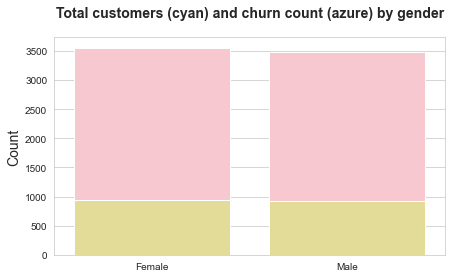

In [5]:
# DISTRIBUTION OF GENDER ATTRIBUTE
sns.set_style('whitegrid')
plt.figure(figsize=(7,4))

gender_dist = df['gender'].value_counts()
sns.barplot(x=gender_dist.index, y=gender_dist.values, color='pink')

gender_churn_dist = df[df.Churn=='Yes']['gender'].value_counts()
sns.barplot(x= gender_churn_dist.index, y=gender_churn_dist.values, color='khaki')

# Label the graph
plt.title('Total customers (cyan) and churn count (azure) by gender', 
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14)

In [6]:
# To make categorical variable visualizable and more readable
df['SeniorCitizen'].astype('object')
df.replace(to_replace={'SeniorCitizen': {0:'No', 1:'Yes'}}, inplace=True)
df.replace(to_replace={'MultipleLines': {'No phone service':'N/A'}}, inplace=True)

# Get a list of attributes to visualize
cat_cols_viz = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                'PaperlessBilling', 'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

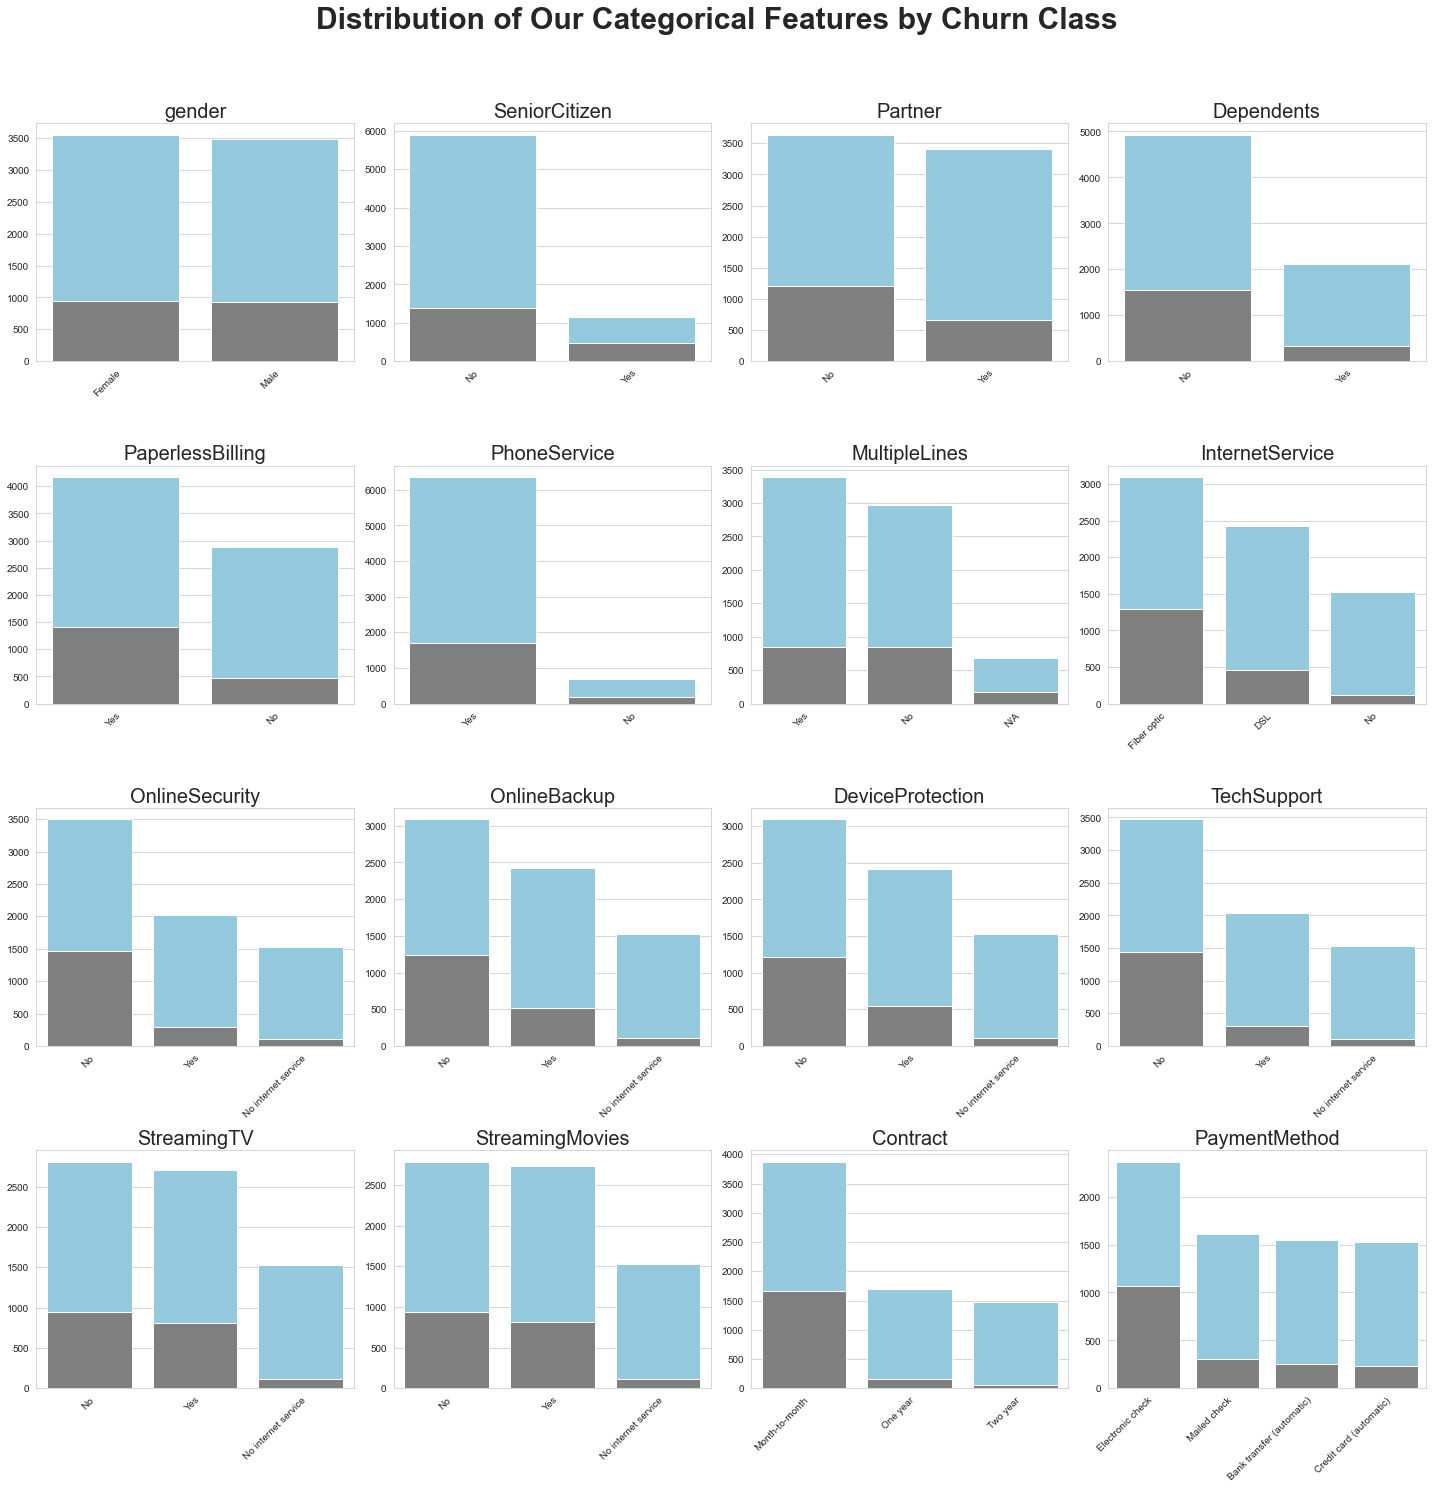

In [7]:
# TO VISUALIZE THE CATEGORICAL VARIABLES 
# Set style
sns.set_style('whitegrid')

# Set up subplot to display graphs
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20), sharex=False, sharey=False)
plt.suptitle('Distribution of Our Categorical Features by Churn Class', 
             fontsize=30, fontweight='bold', y=1.032)

# Initialize row and column index iterators in preparation for filling in the subplot
row_iterator = 0
col_iterator = 0

# Fill in the subplot
for col in cat_cols_viz:
    # Adjust indices once we reach the end of a row (moving from left to right)
    if col_iterator == 4:
        col_iterator = 0
        row_iterator = row_iterator + 1
    
    
    # Initialize value count series
    valCount_series = df[col].value_counts()
    churn_valCount_series = df[df.Churn=='Yes'][col].value_counts()
    
    
    # Create the barplot (in blue) depicting customer count--by column
    sns.barplot(x=valCount_series.index, y=valCount_series.values, color='skyblue', ax=axes[row_iterator][col_iterator])
    
    # Create the barplot (in orange) depicting customer churn count--by column
    sns.barplot(x=churn_valCount_series.index, y=churn_valCount_series.values, color='grey', ax=axes[row_iterator][col_iterator])

    # Label the graph
    axes[row_iterator][col_iterator].set_title('%s' % col, fontsize=20)
        
    # Rotate xlabels
    plt.sca(axes[row_iterator, col_iterator])
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')    
    
    # Increment row and column indices
    col_iterator = col_iterator + 1

    
# Adjust spacing of subplot
fig.tight_layout()

In [8]:
# LETS GROUP THE VARIABLES OR ATTRIBUTES ACCORDING TO THEIR SPECIFIC DATA TYPES
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# WE CHECK FOR MISSING VALUES OR NAN
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [11]:
# unique values
df["PaymentMethod"].nunique(), df["PaymentMethod"].unique()

df["Contract"].nunique(), df["Contract"].unique()

(3, array(['Month-to-month', 'One year', 'Two year'], dtype=object))

In [12]:
# check target variable distribution, CHURN
# Unique value of the dataset
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.02, 'CustomerCount for both Churn and Non-Churn')

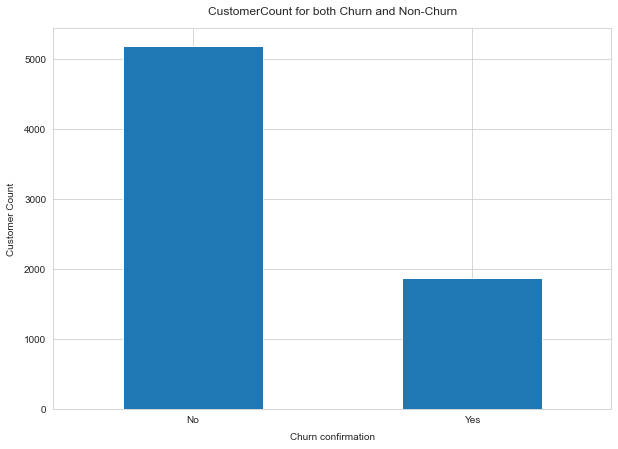

In [13]:
# A VISUAL REPRESENTATION OF THE TARGET VARIABLE DISTRIBUTION
df["Churn"].value_counts().plot(kind = 'bar', figsize = (10, 7), rot = 0)
plt.xlabel("Churn confirmation", labelpad = 8)
plt.ylabel("Customer Count", labelpad = 8)
plt.title("CustomerCount for both Churn and Non-Churn", y = 1.02)

In [14]:
# data cleaning and manipuation
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
df["TotalCharges"] = df["TotalCharges"].astype('float')

In [15]:
df.info(), df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
 customerID          False
 gender              False
 SeniorCitizen       False
 Partner             False
 Dependents          False
 tenure              False
 PhoneService        False
 MultipleLines       False
 InternetService     False
 OnlineSecurity      False
 OnlineBackup        False
 DeviceProtection    False
 TechSupport         False
 StreamingTV         False
 StreamingMovies     False
 Contract            False
 PaperlessBilling    False
 PaymentMethod       False
 MonthlyCharges      False
 TotalCharges         True
 Churn               False
 dtype: bool)

In [16]:
# Checking for columns with missing values and filling them up with mean values of each column
nan_cols = df.isna().any()
nan_cols = nan_cols[nan_cols == True].reset_index()
nan_cols = nan_cols["index"].tolist()
for col in df.columns[1:]:
    if col in nan_cols:
        if df[col].dtypes != 'object':
            df[col]= df[col].fillna(df[col].mean())

In [17]:
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [18]:
# Label enconder
le = LabelEncoder()
le_count = 0
for col in df.columns[1:]:
    if df[col].dtypes == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded. '.format(le_count))     

7 columns were label encoded. 


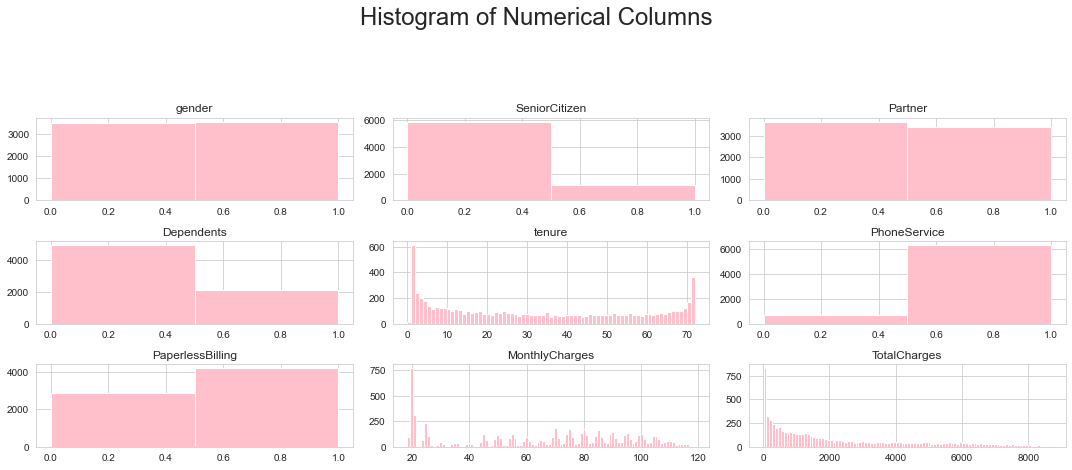

In [19]:
# Histogram
df2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

fig = plt.figure(figsize = (15, 12))
plt.suptitle('Histogram of Numerical Columns\n', horizontalalignment = 'center', fontstyle = 'normal', fontsize = 24, fontfamily = 'sans-serif')
for i in range(df2.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])
    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(df2.iloc[:, i], bins = vals, color = ('pink'))
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

In [20]:
df2 = df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
correlations = df2.corrwith(df.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199428
tenure         -0.352229
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

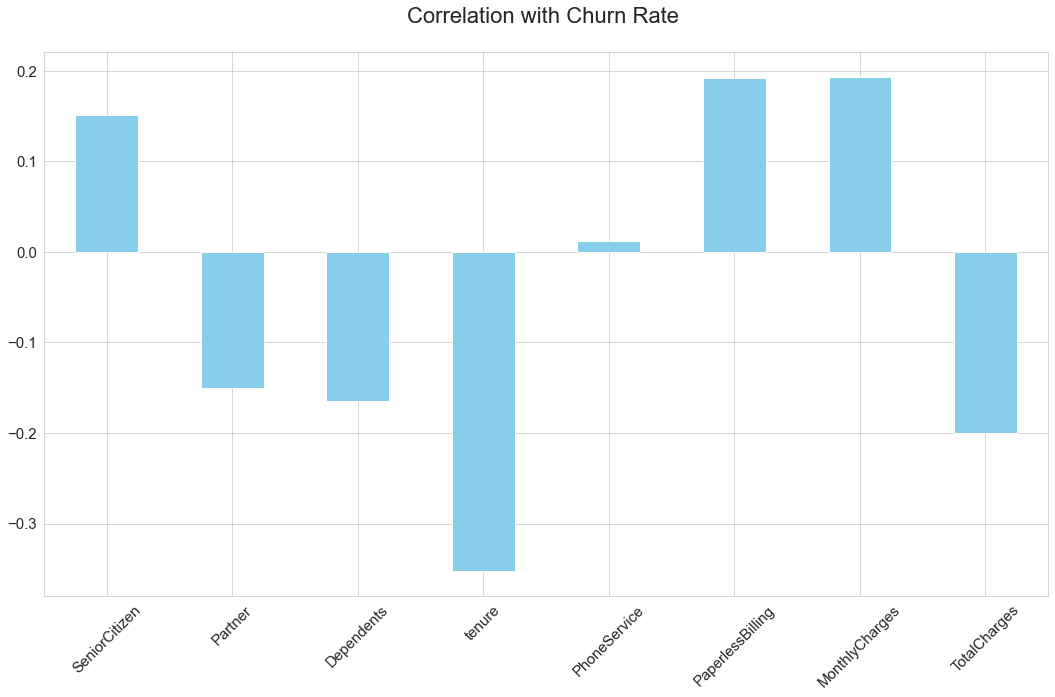

In [21]:
#Lets visualize the correlation with Churn Rate
correlations = df2.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'skyblue',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

Text(0.5, 0, 'Total payment amount')

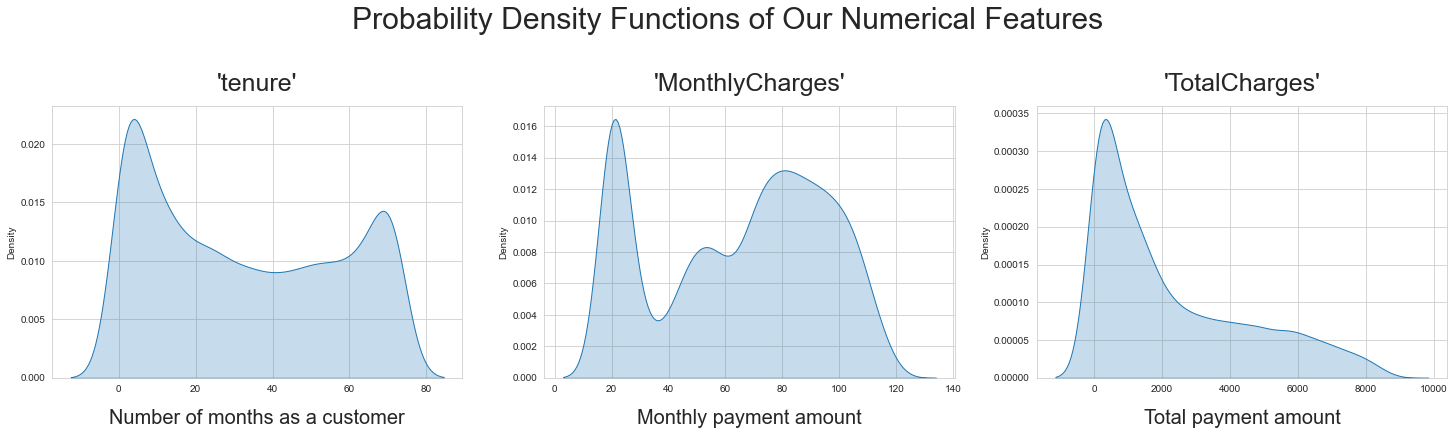

In [22]:
# Demonstrate the distributions of the numeric attributes
sns.set_style('whitegrid')

# Present the graphs side-by-side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5), sharex=False, sharey=False)
plt.suptitle('Probability Density Functions of Our Numerical Features', 
             fontsize=30, fontweight='normal', y=1.155)

# Graphic distribution of 'tenure'
tenure_distPlot = sns.kdeplot(data= df['tenure'], shade=True, ax=axes[0])
axes[0].set_title("'tenure'", fontsize=25, pad=15)
axes[0].set_xlabel("Number of months as a customer", fontsize=20, labelpad=15)

# Graphic distribution of 'MonthlyCharges'
monthlyCharge_distPlot = sns.kdeplot(data= df['MonthlyCharges'], shade=True, ax=axes[1])
axes[1].set_title("'MonthlyCharges'", fontsize=25, pad=15)
axes[1].set_xlabel("Monthly payment amount", fontsize=20, labelpad=15)

# Graphic distribution of 'TotalCharges'
totalCharge_distPlot = sns.kdeplot(data= df['TotalCharges'], shade=True, ax=axes[2])
axes[2].set_title("'TotalCharges'", fontsize=25, pad=15)
axes[2].set_xlabel("Total payment amount", fontsize=20, labelpad=15)

Text(0, 0.5, 'Total payment amount')

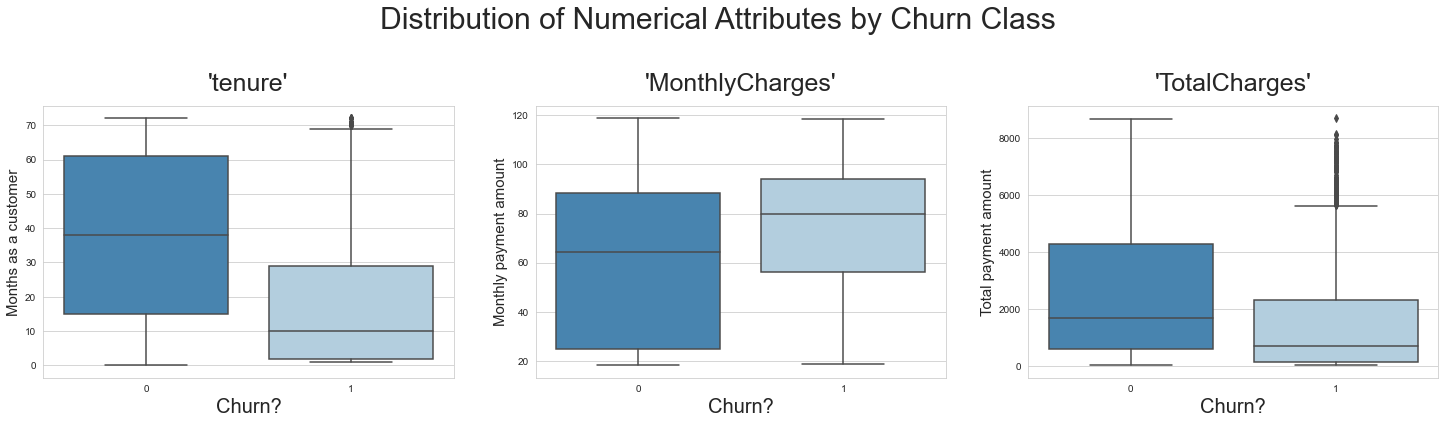

In [23]:
# Showing distributions of numerical attributes by churn class side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5), sharex=False, sharey=False)
plt.suptitle('Distribution of Numerical Attributes by Churn Class', 
             fontsize=30, fontweight='normal', y=1.155)

# Graphic distribution of 'tenure'
tenure_boxPlot = sns.boxplot(x=df['Churn'], y=df['tenure'], 
                             ax=axes[0], palette='Blues_r')
axes[0].set_title("'tenure'", fontsize=25, pad=15)
axes[0].set_xlabel("Churn?", fontsize=20)
axes[0].set_ylabel("Months as a customer", fontsize=15)


# Graphic distribution of 'MonthlyCharges'
monthlyCharges_boxPlot = sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'], 
                                     ax=axes[1], palette='Blues_r')
axes[1].set_title("'MonthlyCharges'", fontsize=25, pad=15)
axes[1].set_xlabel("Churn?", fontsize=20)
axes[1].set_ylabel("Monthly payment amount", fontsize=15)

# Graphic distribution of 'TotalCharges'
totalCharges_boxPlot = sns.boxplot(x=df['Churn'], y= df['TotalCharges'], 
                                   ax=axes[2], palette='Blues_r')
axes[2].set_title("'TotalCharges'", fontsize=25, pad=15)
axes[2].set_xlabel("Churn?", fontsize=20)
axes[2].set_ylabel("Total payment amount", fontsize=15)

In [24]:
# Checking the variance inflation factor to overcome issue of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def calc_vif(Z):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = Z.columns
    vif["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]

    return(vif)

df2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges','TotalCharges']]

calc_vif(df2)

variables        VIF
0            gender   1.921285
1     SeniorCitizen   1.327766
2           Partner   2.815272
3        Dependents   1.921208
4            tenure  10.549726
5      PhoneService   7.976437
6  PaperlessBilling   2.814154
7    MonthlyCharges  13.988695
8      TotalCharges  12.570370

In [25]:
df2 = df2.drop(columns = "TotalCharges")

#Revalidate Colinearity:

df2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges']]

calc_vif(df2)

variables       VIF
0            gender  1.879536
1     SeniorCitizen  1.323089
2           Partner  2.814574
3        Dependents  1.908533
4            tenure  3.287603
5      PhoneService  5.963240
6  PaperlessBilling  2.745897
7    MonthlyCharges  7.453993

In [26]:
# LETS ADOPT THE ABOVE CHANGES INTO THE MAIN DATA FRAME
df = df.drop(columns = "TotalCharges")  

In [27]:
# ENCODING CATEGORICAL DATA
# FOR IF CUSTOMERiD IS AN OBJECT DTYPES:    
identity = df["customerID"]
df = df.drop(columns="customerID")

# convert the remaining categorical variables into dummy
df = pd.get_dummies(df)

# Merge custonerid to dataset (column concatenation)
df = pd.concat([df, identity], axis = 1)

In [28]:
# identify target variable and droppoing 'gender' because it does not impact the churning tendencies:    
target = df["Churn"]
non_target = df.drop(columns=["Churn", "gender"])

In [29]:
# WE SPLIT THE DATA IN PREPARATION FOR TRAINING THE DATASET
X_train, X_test, y_train, y_test = train_test_split(non_target, target,
                                                    stratify = target, 
                                                    test_size = 0.2,
                                                    random_state = 0)

# if there is any class imbalance resolve with use of stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 39)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 39)
Number transactions y_test dataset:  (1409,)


In [30]:
# Creating identity and Dropping identifiers
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [31]:
# FEATURE SCALING MANIPULATION
# Instantiate StandardScaler
scale_X = StandardScaler()
X_train2 = pd.DataFrame(scale_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(scale_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# <center>LOGISTIC REGRESSION ALGORITHM APPLICATION TO TELCO CUSTOMER CHURN PREDICTION</center>

In [32]:
# INSTANTIATE LOGISTIC REGRESSION
lgreg = LogisticRegression(fit_intercept = False, C = 1e13, solver = 'liblinear')

# FITTING THE X- AND y- TRAINS DATASET
lgreg.fit(X_train, y_train)

LogisticRegression(C=10000000000000.0, fit_intercept=False, solver='liblinear')

In [33]:
# NEXT IS TO PREDICT CHURNS FROM THE LOGISTIC REGRESION MODEL
y_pred_train = lgreg.predict(X_train)
y_pred_test = lgreg.predict(X_test)

In [34]:
# MODEL PERFORMANCE EVALUATION. RESIDUAL DISTANCE BETWEEN ACTUAL TRAINING DATA AND PREDICTED TRAINING DATA; ALSO BETWEEN
# ACTUAL TEST DATA AND PREDICTED TEST DATA
residuals = np.abs(y_train - y_pred_train)
#CHECK NUMBER OF TIMES THE MODEL PREDICTED CORRECTLY ('0') AND INCORRECTLY ('1')
print(pd.Series(residuals).value_counts())

# LETS NORMALIZE AMOUNT OF TIME THE MODEL WAS CORRECT(PERCENTAGE)
print(pd.Series(residuals).value_counts(normalize = True))

0    3971
1    1663
Name: Churn, dtype: int64
0    0.704828
1    0.295172
Name: Churn, dtype: float64


In [35]:
# LETS PERFORM THE SAME OPERATION ON THE PREDICTED TEST DATASET
test_resids = np.abs(y_test - y_pred_test)
print(pd.Series(test_resids).value_counts())

#Normalize amount of time the model was correct (percentage)
print(pd.Series(test_resids).value_counts(normalize = True))

0    1017
1     392
Name: Churn, dtype: int64
0    0.721789
1    0.278211
Name: Churn, dtype: float64


In [36]:
# LETS TAKE A LOOK AT THE MODEL EVALUATIONS USING ACCURACY PRECISION, RECALL AND F1 SCORE
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
f2 = fbeta_score(y_test, y_pred_test, beta = 2.0)

evaluation = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall',
                                                                                      'F1 Score', 'F2 Score'])
evaluation = evaluation.sort_values(['Precision', 'Recall', 'F2 Score'], ascending = False)
print(evaluation)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.721789   0.486527  0.868984    0.6238  0.750924


In [37]:
# APPLYING K-FOLD CROSS VALIDATION THAT CAN CONFIRM MODEL VARIANCE
lgreg_accuracies = cross_val_score(lgreg,
                                  X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy:, % 0.2f (+/- %0.2f)" % (lgreg_accuracies.mean(), lgreg_accuracies.std()* 2))

Logistic Regression Classifier Accuracy:,  0.70 (+/- 0.03)


Text(0.5, 16.0, 'Predicted Label\n')

<Figure size 2304x1728 with 0 Axes>

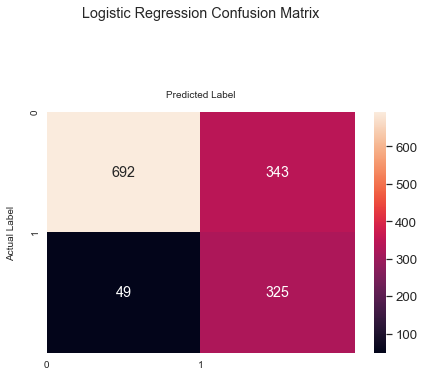

In [38]:
# USING CONFUSION MATRIX WE DETERMINE THE CORRECT PREDICTIONS AND INCORRECT PREDICTIONS
confusmatrix = confusion_matrix(y_test, y_pred_test)
confusmatrix_df = pd.DataFrame(confusmatrix, index = (0,1), columns = (0,1))
plt.figure(figsize = (32, 24))
fig, ax = plt.subplots()
sn.set(font_scale = 1.2)
sn.heatmap(confusmatrix_df, annot = True, fmt = 'g'#, cmap = "YlGnBu"
          )
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix\n', y = 1.3)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel("Actual Label\n")
plt.xlabel("Predicted Label\n")

No Skill: ROC AUC = 0.500
Logistic: ROC AUC =  0.847


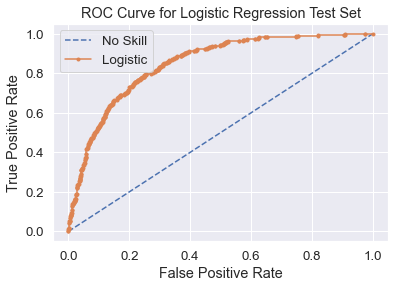

In [39]:
#ROC CURVE() AND AUC FUNCTION FOR LOGISTIC REGRESSION MODEL
# Generate a No Skill Prediction
ns_probs = [0 for e in range(len(y_test))]
# Probabilities for predicted values
lr_probs = lgreg.predict_proba(X_test)

# Retaining only the probabilities of the positive prediction
lr_probs = lr_probs[:,1]

#Scores Calculation
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarizing Scores
print('No Skill: ROC AUC = %.3f' % (ns_auc))
print('Logistic: ROC AUC = % .3f' % (lr_auc))

# find the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plotting the ROC Curve for the Model
plt.plot(ns_fpr, ns_tpr, linestyle = 'dashed', label = 'No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label = 'Logistic')
plt.title('ROC Curve for Logistic Regression Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC = 0.500
Logistic: ROC AUC =  0.841


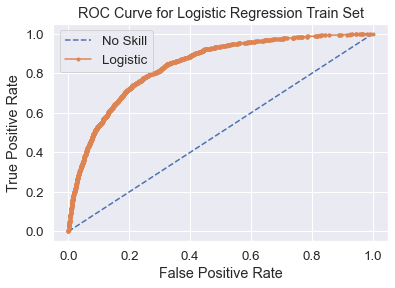

In [40]:
ns_probs = [0 for e in range(len(y_train))]
# Probabilities for predicted values
lr_probs = lgreg.predict_proba(X_train)

# Retaining only the probabilities of the positive prediction
lr_probs = lr_probs[:,1]

#Scores Calculation
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)

# Summarizing Scores
print('No Skill: ROC AUC = %.3f' % (ns_auc))
print('Logistic: ROC AUC = % .3f' % (lr_auc))

# find the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

# Plotting the ROC Curve for the Model
plt.plot(ns_fpr, ns_tpr, linestyle = 'dashed', label = 'No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label = 'Logistic')
plt.title('ROC Curve for Logistic Regression Train Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [41]:
# FINE TUNING LOGISTIC REGRESSION MODEL WITH HYPERPARAMETER TUNING
#HYPERPARAMETER TUNING OF LOGISTIC REGRESSION
# GRIDSEARCH Cv METHOD; STAGE1
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
# Defining gridSearch
grid = dict(penalty = penalty, C = c_values, solver = solver)
grid_search = GridSearchCV(estimator = lgreg, param_grid = grid, n_jobs = -1,
                          cv = 10, scoring = "balanced_accuracy")
grid_result = grid_search .fit(X_train, y_train)
# Summary results
lg_best_accuracy = grid_result.best_score_
lg_best_parameters = grid_result.best_params_
lg_best_accuracy, lg_best_parameters

(0.7521619840826291, {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'})

In [42]:
# STAGE2:
import time
penalty = ['l2']
# ASSIGN REGULARIZATION HYPERPARAMETER VALUE
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# SUM THE ABOVE
parameters = dict(C=C, penalty=penalty)
grid_search = GridSearchCV(estimator = lgreg,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_result  = grid_search .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lg_best_accuracy = grid_result.best_score_
lg_best_parameters = grid_result.best_params_
lg_best_accuracy, lg_best_parameters

Took 1.39 seconds


(0.7521619840826291, {'C': 0.01, 'penalty': 'l2'})

In [43]:
# HYPERPARAMETER TUNING LOGISTIC REGRESSION
lgreg = LogisticRegression(random_state = 0, penalty = 'l2')
lgreg.fit(X_train, y_train)
# Predict the Test set results
y_pred2 = lgreg.predict(X_test)
#probability score
y_pred_probs = lgreg.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
y_pred_probs

array([0.01863647, 0.34535509, 0.78904641, ..., 0.0185257 , 0.09284766,
       0.74129712])

Test Data Accuracy: 0.8041


<Figure size 1728x1152 with 0 Axes>

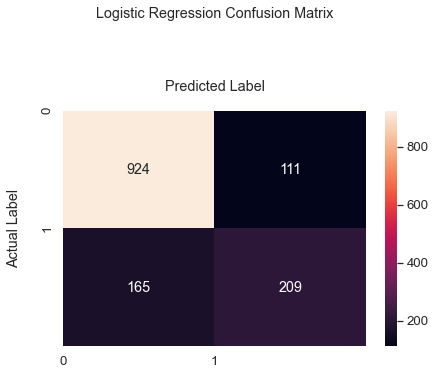

In [44]:
# APPLYING CONFUSION MATRIX TO CONTRAST PREDICTIONS WITH TEST SET
confusmatrix2 = confusion_matrix(y_test, y_pred2)
confusmatrix2
# Confusion Matrix as a crosstab
pd.crosstab(np.array(y_test), np.array(pd.Series(y_pred2)), rownames = ['ACTUAL'], colnames = ['PRED'], margins = True)
# Let visualize the confusion matrix
confusmatrix2_df = pd.DataFrame(confusmatrix2, index = (0,1), columns = (0,1))
plt.figure(figsize = (24, 16))

fig, ax = plt.subplots()
sn.set(font_scale = 1.2)
sn.heatmap(confusmatrix2_df, annot = True, fmt = 'g'#, cmap = "YlGnBu"
          )
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix\n', y = 1.3)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel("Actual Label\n")
plt.xlabel("Predicted Label\n")

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred2))

In [45]:
# CREATE A DATAFRAME BASED ON THE RESULTS OF PREDICTIONS
lgreg_results = pd.concat([test_identity, y_test], axis = 1).dropna()
lgreg_results['predictions'] = y_pred2
lgreg_results["propensity_to_churn(%)"] = y_pred_probs
lgreg_results["propensity_to_churn(%)"] = lgreg_results["propensity_to_churn(%)"]*100
lgreg_results["propensity_to_churn(%)"] = lgreg_results["propensity_to_churn(%)"].round(2)
lgreg_results = lgreg_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
lgreg_results ['Ranking'] = pd.qcut(lgreg_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (lgreg_results.head(30))

      customerID  Churn  predictions  propensity_to_churn(%) Ranking
5532  8174-LNWMW      0            0                    1.86       9
5173  2480-SQIOB      0            0                   34.54       4
7010  0723-DRCLG      1            1                   78.90       1
6507  5708-EVONK      1            0                   18.06       5
5985  3585-YNADK      0            0                    4.00       8
5636  0601-WZHJF      1            1                   53.28       3
6667  0872-NXJYS      1            1                   69.53       1
6501  4753-PADAS      0            0                   14.92       6
2367  0235-KGSLC      1            1                   66.05       2
1018  3748-FVMZZ      0            1                   56.01       2
6002  3727-RJMEO      1            1                   77.35       1
1354  9415-DPEWS      1            1                   62.73       2
6225  1452-UZOSF      0            0                    2.19       9
5038  4815-TUMEQ      0           

In [46]:
# APPLYING SHAPLEY TO THIS MODELING
shap.initjs()
%time explainer = shap.Explainer(lgreg, X_train)
shap_values1 = explainer(X_train)

Wall time: 6.99 ms


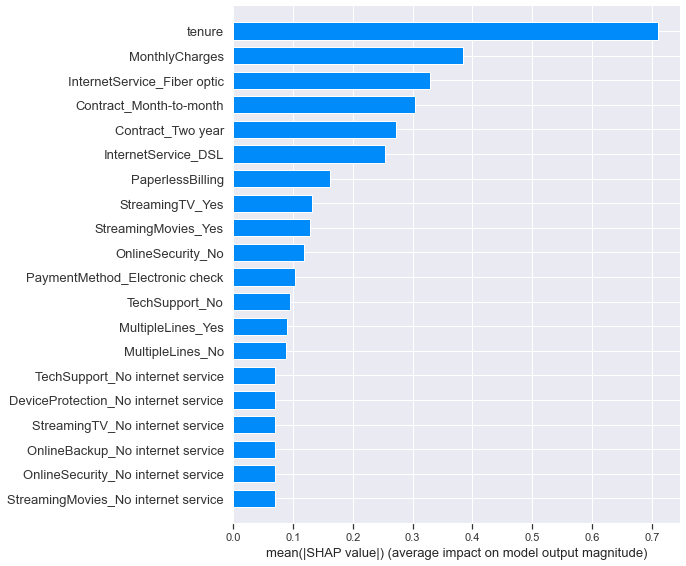

In [47]:
shap.summary_plot(shap_values1, X_train, plot_type="bar")

In [48]:
# Analyzing Coefficients
feature_importances = pd.concat([
pd.DataFrame(df.drop(columns = 'Churn').
columns, columns = ["features"]),
pd.DataFrame(np.transpose(lgreg.coef_), 
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

features      coef
11                      InternetService_DSL  0.329791
31                      StreamingMovies_Yes  0.308773
5                              PhoneService  0.165268
27          StreamingTV_No internet service  0.135662
30      StreamingMovies_No internet service  0.133168
13                       InternetService_No  0.118319
36    PaymentMethod_Credit card (automatic)  0.113944
22                     DeviceProtection_Yes  0.095580
9                          MultipleLines_No  0.091266
0                                    gender  0.078844
16                       OnlineSecurity_Yes  0.052999
21     DeviceProtection_No internet service  0.049921
19                         OnlineBackup_Yes  0.023040
18         OnlineBackup_No internet service  0.018509
4                                    tenure  0.002560
7                            MonthlyCharges -0.002560
1                             SeniorCitizen -0.008786
34                        Contract_Two year -0.027245
24          TechSupport_No internet service -0.028293
37           PaymentMethod_Electronic check -0.036325
32                  Contract_Month-to-month -0.043871
15       OnlineSecurity_No internet service -0.053178
28                          StreamingTV_Yes -0.060834
25                          TechSupport_Yes -0.062736
35  PaymentMethod_Bank transfer (automatic) -0.065677
2                                   Partner -0.070186
23                           TechSupport_No -0.084795
14                        OnlineSecurity_No -0.084795
26                           StreamingTV_No -0.084795
29                       StreamingMovies_No -0.084795
20                      DeviceProtection_No -0.084795
17                          OnlineBackup_No -0.084795
12              InternetService_Fiber optic -0.084795
8                         MultipleLines_N/A -0.088561
10                        MultipleLines_Yes -0.269272
33                        Contract_One year -0.318448
6                          PaperlessBilling -0.440927
3                                Dependents -0.797805
38               PaymentMethod_Mailed check       NaN
39                               customerID       NaN

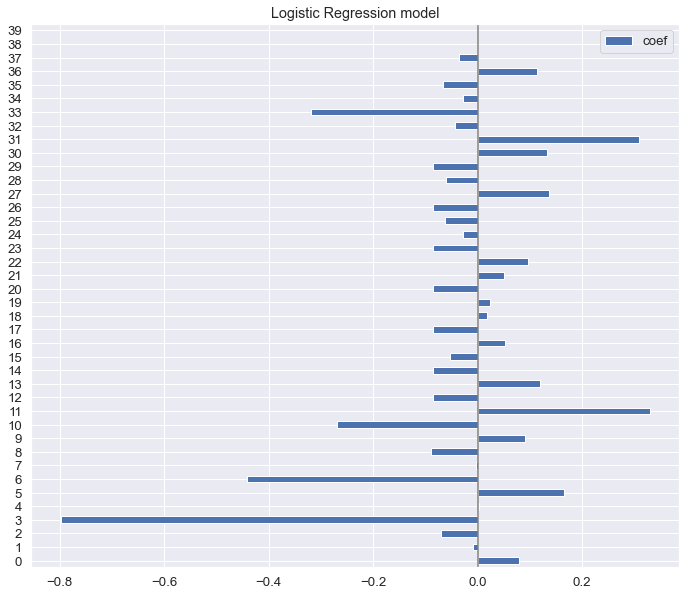

In [49]:
import matplotlib.pyplot as plt
feature_importances = pd.concat([
pd.DataFrame(df.drop(columns = 'Churn').
columns, columns = ["features"]),
pd.DataFrame(np.transpose(lgreg.coef_), 
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)


feature_importances.plot(kind='barh', figsize=(15, 10))
plt.title('Logistic Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

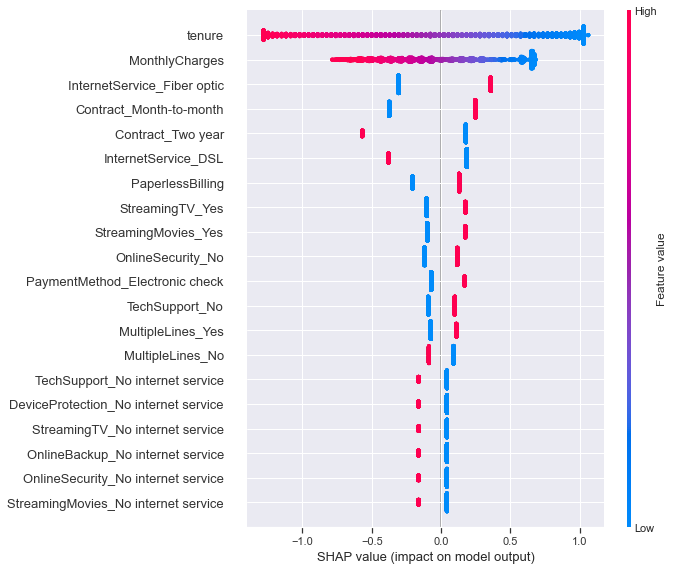

In [50]:
shap.summary_plot(shap_values1, X_train)

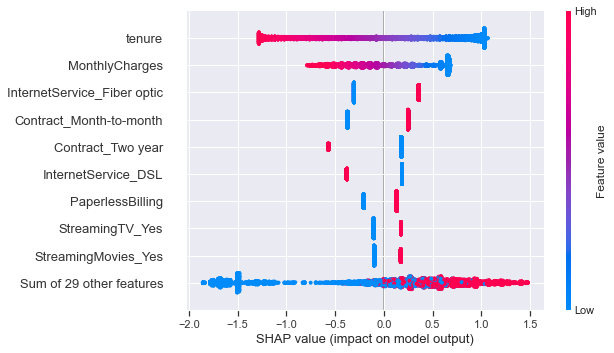

In [51]:
shap.plots.beeswarm(shap_values1)

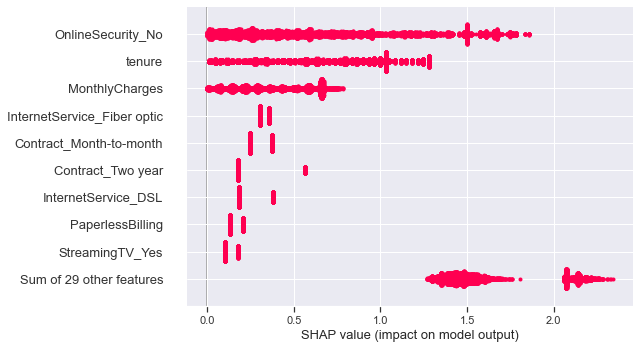

In [52]:
shap.plots.beeswarm(shap_values1.abs, color="shap_red")

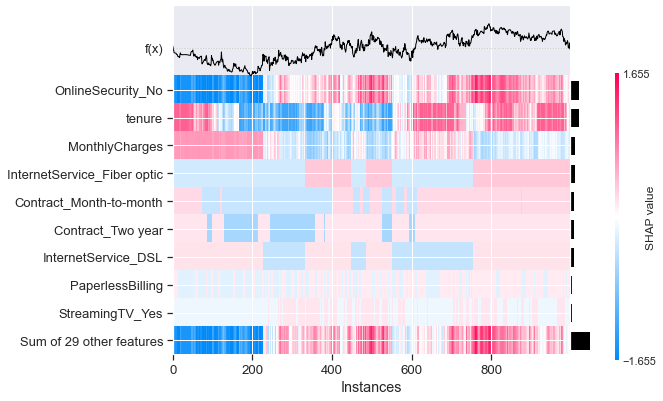

In [53]:
shap.plots.heatmap(shap_values1[:1000])

##      XGBOOST CLASSIFIER APPLICATION IN TELCO CHURN PREDICTION MODEL

In [54]:
# EXTREME GRADIENT BOOSTING CLASSIFIER
# XGBoost MODEL DESCRIPTION
params = {'objective':'binary:logistic',
          'missing': 1,
         'seed': 42
         }

# INSTANTIATE THE XGBOOST CLASSIFIER
xgb_clf = XGBClassifier(**params)

In [55]:
# Next is to perform fit on the xgb_clf model
xgb_clf.fit(X_train, y_train, verbose = True,
           early_stopping_rounds =10,
           eval_metric = 'aucpr',
           eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.61379
[1]	validation_0-aucpr:0.62513
[2]	validation_0-aucpr:0.63983
[3]	validation_0-aucpr:0.63528
[4]	validation_0-aucpr:0.63283
[5]	validation_0-aucpr:0.63209
[6]	validation_0-aucpr:0.64575
[7]	validation_0-aucpr:0.64373
[8]	validation_0-aucpr:0.64646
[9]	validation_0-aucpr:0.64746
[10]	validation_0-aucpr:0.64647
[11]	validation_0-aucpr:0.64575
[12]	validation_0-aucpr:0.64561
[13]	validation_0-aucpr:0.64628
[14]	validation_0-aucpr:0.64642
[15]	validation_0-aucpr:0.64552
[16]	validation_0-aucpr:0.64719
[17]	validation_0-aucpr:0.64595
[18]	validation_0-aucpr:0.64380


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
# Checking for the training and test sets accuracy
score = xgb_clf.score(X_train, y_train)
score_xgb = xgb_clf.score(X_test, y_test)
print("TRAINING SET ACCURACY: ", '%.3f' %(score))
print("TEST SET ACCURACY: ", '%.3f' %(score_xgb))

TRAINING SET ACCURACY:  0.838
TEST SET ACCURACY:  0.799


In [57]:
# NEXT IS TO DETERMINE CHURN PREDICTION
xgbclf_predictions = xgb_clf.predict(X_test)
xgbclf_probs = xgb_clf.predict_proba(X_test)
print(xgbclf_predictions)

[0 1 1 ... 0 0 1]


In [58]:
print(xgbclf_probs)

[[0.97051096 0.02948904]
 [0.4993927  0.5006073 ]
 [0.17450291 0.8254971 ]
 ...
 [0.97051096 0.02948904]
 [0.8426815  0.1573185 ]
 [0.11100411 0.8889959 ]]


In [59]:
# LETS TAKE A LOOK AT THE MODEL EVALUATIONS USING ACCURACY PRECISION, RECALL AND F1 SCORE
acc = accuracy_score(y_test, xgbclf_predictions)
prec = precision_score(y_test, xgbclf_predictions)
rec = recall_score(y_test, xgbclf_predictions)
f1 = f1_score(y_test, xgbclf_predictions)
f2 = fbeta_score(y_test, xgbclf_predictions, beta = 2.0)

evaluation = pd.DataFrame([['XGBoost Classifier', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall',
                                                                                      'F1 Score', 'F2 Score'])
evaluation = evaluation.sort_values(['Precision', 'Recall', 'F2 Score'], ascending = False)
print(evaluation)

                Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  XGBoost Classifier  0.799148   0.659649  0.502674  0.570561  0.527793


Test Data Accuracy: 0.7991


<Figure size 2304x1728 with 0 Axes>

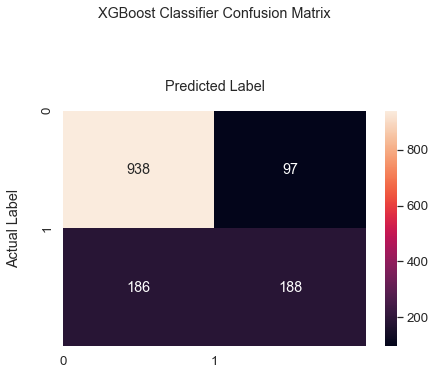

In [60]:
# CONFUSION MATRIX CALCULATION FOR XGBoost CLASSIFIER
cmx = confusion_matrix(y_test, xgbclf_predictions)
cmx_df = pd.DataFrame(cmx, index = (0,1), columns = (0,1))
plt.figure(figsize = (32, 24))
fig, ax = plt.subplots()
sn.set(font_scale = 1.2)
sn.heatmap(cmx_df, annot = True, fmt = 'g'#, cmap = "YlGnBu"
          )
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('XGBoost Classifier Confusion Matrix\n', y = 1.3)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel("Actual Label\n")
plt.xlabel("Predicted Label\n")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, xgbclf_predictions))

In [61]:
print(confusion_matrix(y_test, xgbclf_predictions))
print(classification_report(y_test, xgbclf_predictions))
print(accuracy_score(y_test, xgbclf_predictions))

[[938  97]
 [186 188]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

0.7991483321504613


No Skill: ROC AUC = 0.500
RFC: ROC AUC =  0.841


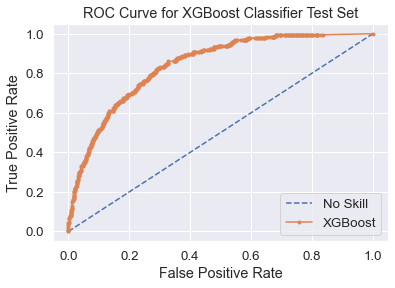

In [62]:
# ROC CURVE() AND AUC FUNCTION FOR XGBoost CLassifier MODEL
# Generate a No Skill Prediction
ns_probs = [0 for e in range(len(y_test))]
# Probabilities for predicted values
xgbclf_probs = xgb_clf.predict_proba(X_test)

# Retaining only the probabilities of the positive prediction
xgbclf_probs = xgbclf_probs[:,1]

#Scores Calculation
ns_auc = roc_auc_score(y_test, ns_probs)
xgbclf_auc = roc_auc_score(y_test, xgbclf_probs)

# Summarizing Scores
print('No Skill: ROC AUC = %.3f' % (ns_auc))
print('RFC: ROC AUC = % .3f' % (xgbclf_auc))

# find the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgbclf_fpr, xgbclf_tpr, _ = roc_curve(y_test, xgbclf_probs)

# Plotting the ROC Curve for the Model
plt.plot(ns_fpr, ns_tpr, linestyle = 'dashed', label = 'No Skill')
plt.plot(xgbclf_fpr, xgbclf_tpr, marker = '.', label = 'XGBoost')
plt.title('ROC Curve for XGBoost Classifier Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC = 0.500
XGBoost Classifier: ROC AUC =  0.901


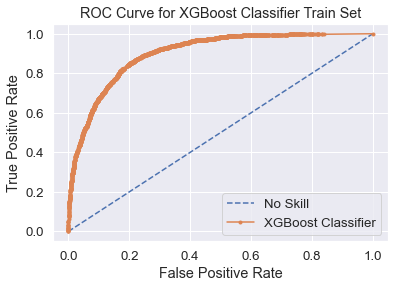

In [63]:
ns_probs = [0 for e in range(len(y_train))]
# Probabilities for predicted values
xgbclf_probs = xgb_clf.predict_proba(X_train)

# Retaining only the probabilities of the positive prediction
xgbclf_probs = xgbclf_probs[:,1]

#Scores Calculation
ns_auc = roc_auc_score(y_train, ns_probs)
xgbclf_auc = roc_auc_score(y_train, xgbclf_probs)

# Summarizing Scores
print('No Skill: ROC AUC = %.3f' % (ns_auc))
print('XGBoost Classifier: ROC AUC = % .3f' % (xgbclf_auc))

# find the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
xgbclf_fpr, xgbclf_tpr, _ = roc_curve(y_train, xgbclf_probs)

# Plotting the ROC Curve for the Model
plt.plot(ns_fpr, ns_tpr, linestyle = 'dashed', label = 'No Skill')
plt.plot(xgbclf_fpr, xgbclf_tpr, marker = '.', label = 'XGBoost Classifier')
plt.title('ROC Curve for XGBoost Classifier Train Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [64]:
# FINE TUNING XGBoosT CLASSIFIER MODEL WITH HYPERPARAMETER TUNING
# HYPERPARAMETER TUNING OF XGBoost CLASSIFIER
# GRIDSEARCH Cv METHOD; STAGE1
param_grid = { 
    'max_depth': [3, 4, 5], 
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0, 25, 1],
    'reg_lambda': [0, 1, 10,],
    'scale_pos_weight': [1, 3, 5]
     }
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                                          seed=42, subsample=0.9, 
                                                          colsample_bytree=0.5),
                              param_grid = param_grid, scoring = 'roc_auc', 
                              verbose = 0, n_jobs = 10, cv = 3)

optimal_params.fit(X_train, y_train, early_stopping_rounds=10, 
                   eval_metric='auc', 
                   eval_set=[(X_test, y_test)], 
                   verbose=False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [65]:
# SUMMARIZING THE RESULTS
xgbclf_best_accuracy = optimal_params.best_score_
xgbclf_best_parameters = optimal_params.best_params_
xgbclf_best_accuracy, xgbclf_best_parameters

(0.8492239444550179,
 {'gamma': 1,
  'learning_rate': 0.1,
  'max_depth': 3,
  'reg_lambda': 1,
  'scale_pos_weight': 1})

In [66]:
# The final XGBoost Classifier model based on the above parameters
xgbclf = xgb.XGBClassifier(seed=42, objective='binary:logistic', gamma=0, learning_rate=0.1, max_depth=4, 
                        reg_lambda=0, scale_pos_weight=3, subsample=0.9, colsample_bytree=0.5)

xgbclf.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.54812
[1]	validation_0-aucpr:0.59342
[2]	validation_0-aucpr:0.61901
[3]	validation_0-aucpr:0.60856
[4]	validation_0-aucpr:0.61359
[5]	validation_0-aucpr:0.61148
[6]	validation_0-aucpr:0.61789
[7]	validation_0-aucpr:0.61833
[8]	validation_0-aucpr:0.62061
[9]	validation_0-aucpr:0.63048
[10]	validation_0-aucpr:0.62817
[11]	validation_0-aucpr:0.63092
[12]	validation_0-aucpr:0.62862
[13]	validation_0-aucpr:0.63283
[14]	validation_0-aucpr:0.63461
[15]	validation_0-aucpr:0.63418
[16]	validation_0-aucpr:0.63156
[17]	validation_0-aucpr:0.63399
[18]	validation_0-aucpr:0.63561
[19]	validation_0-aucpr:0.63463
[20]	validation_0-aucpr:0.63332
[21]	validation_0-aucpr:0.63439
[22]	validation_0-aucpr:0.63902
[23]	validation_0-aucpr:0.63815
[24]	validation_0-aucpr:0.63864
[25]	validation_0-aucpr:0.63775
[26]	validation_0-aucpr:0.63858
[27]	validation_0-aucpr:0.64022
[28]	validation_0-aucpr:0.64255
[29]	validation_0-aucpr:0.64377
[30]	validation_0-aucpr:0.64451
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=0, scale_pos_weight=3,
              seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [67]:
# PREDICTION SET RESULT USING THE HYPERPARAMETER TUNING
pred_a = xgbclf.predict(X_test)
#probability score
y_pred_probs = xgbclf.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
y_pred_probs

array([0.06435424, 0.71265   , 0.8958972 , ..., 0.06087704, 0.2613688 ,
       0.7890053 ], dtype=float32)

Test Data Accuracy: 0.7445


<Figure size 2304x1728 with 0 Axes>

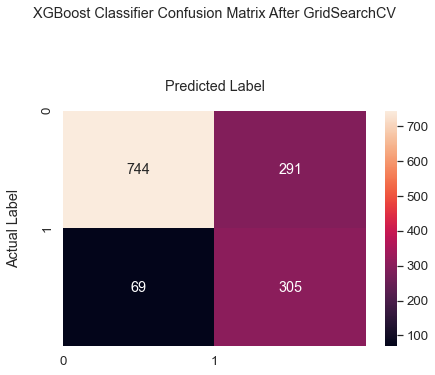

In [68]:
# CONFUSION MATRIX CALCULATION FOR XGBoost CLASSIFIER
cmx = confusion_matrix(y_test, pred_a)
cmx_df = pd.DataFrame(cmx, index = (0,1), columns = (0,1))
plt.figure(figsize = (32, 24))
fig, ax = plt.subplots()
sn.set(font_scale = 1.2)
sn.heatmap(cmx_df, annot = True, fmt = 'g'#, cmap = "YlGnBu"
          )
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('XGBoost Classifier Confusion Matrix After GridSearchCV\n', y = 1.3)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel("Actual Label\n")
plt.xlabel("Predicted Label\n")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, pred_a))

weight:  {'MonthlyCharges': 6.0, 'MultipleLines_N/A': 1.0, 'MultipleLines_Yes': 1.0, 'InternetService_Fiber optic': 1.0, 'OnlineBackup_No': 1.0, 'TechSupport_No': 1.0, 'Contract_Month-to-month': 1.0, 'Contract_One year': 1.0, 'PaymentMethod_Electronic check': 1.0}
gain:  {'MonthlyCharges': 30.78337860107422, 'MultipleLines_N/A': 4.574016571044922, 'MultipleLines_Yes': 22.026931762695312, 'InternetService_Fiber optic': 291.36126708984375, 'OnlineBackup_No': 74.35128784179688, 'TechSupport_No': 27.88885498046875, 'Contract_Month-to-month': 1804.2633056640625, 'Contract_One year': 35.883304595947266, 'PaymentMethod_Electronic check': 12.7164306640625}
cover:  {'MonthlyCharges': 315.4166564941406, 'MultipleLines_N/A': 62.5, 'MultipleLines_Yes': 232.25, 'InternetService_Fiber optic': 1301.25, 'OnlineBackup_No': 504.0, 'TechSupport_No': 797.25, 'Contract_Month-to-month': 1945.5, 'Contract_One year': 179.25, 'PaymentMethod_Electronic check': 465.0}
total_gain:  {'MonthlyCharges': 184.70027160

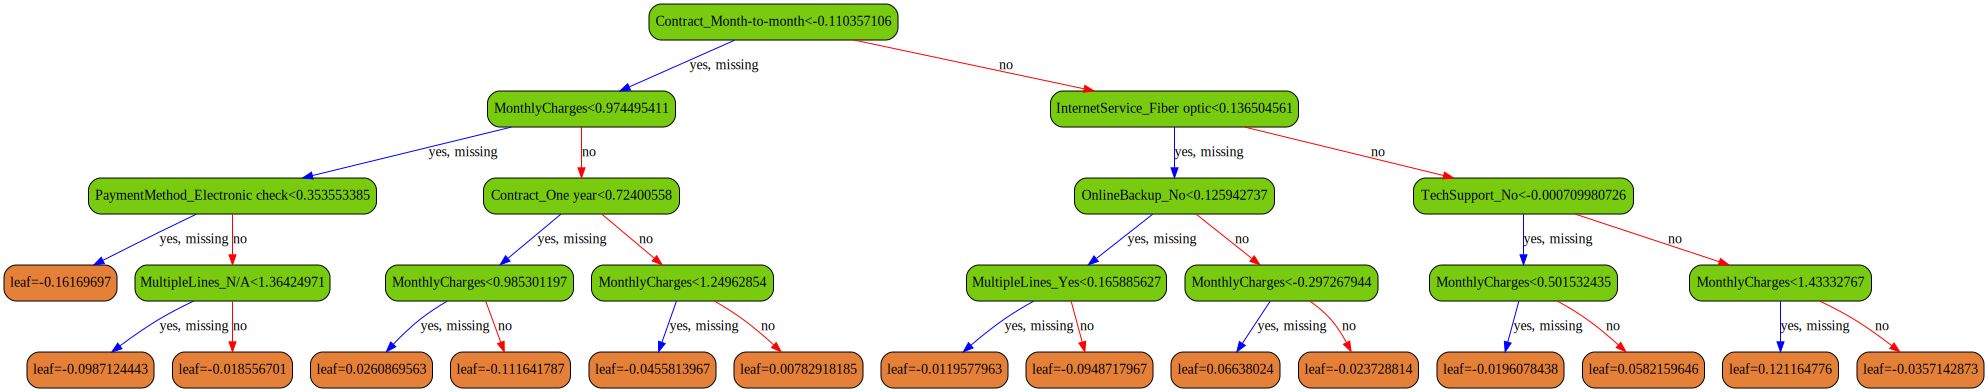

In [69]:
xgbclf = xgb.XGBClassifier(seed=42, objective='binary:logistic', gamma=.25, learning_rate=0.1, max_depth=4, 
                        reg_lambda=10, scale_pos_weight=3, subsample=0.9, colsample_bytree=0.5, n_estimators=1,
                          eval_metric = "mlogloss"
                          )

xgbclf.fit(X_train, y_train)

bst = xgbclf.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box', 'style': 'filled, rounded', 'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box', 'style': 'filled, rounded', 'fillcolor': '#e48038'}

xgb.to_graphviz(xgbclf, num_trees=0, size="2,6", condition_node_params=node_params, leaf_node_params=leaf_params)

In [70]:
# CREATE A DATAFRAME BASED ON THE RESULTS OF PREDICTIONS
xgbclf_results = pd.concat([test_identity, y_test], axis = 1).dropna()
xgbclf_results['predictions'] = pred_a
xgbclf_results["propensity_to_churn(%)"] = y_pred_probs
xgbclf_results["propensity_to_churn(%)"] = xgbclf_results["propensity_to_churn(%)"]*100
xgbclf_results["propensity_to_churn(%)"] = xgbclf_results["propensity_to_churn(%)"].round(2)
xgbclf_results = xgbclf_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
xgbclf_results ['Ranking'] = pd.qcut(xgbclf_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (xgbclf_results.head(30))

      customerID  Churn  predictions  propensity_to_churn(%) Ranking
5532  8174-LNWMW      0            0                6.440000      10
5173  2480-SQIOB      0            1               71.260002       3
7010  0723-DRCLG      1            1               89.589996       1
6507  5708-EVONK      1            0               38.450001       6
5985  3585-YNADK      0            0               12.710000       8
5636  0601-WZHJF      1            1               65.750000       3
6667  0872-NXJYS      1            1               82.570000       1
6501  4753-PADAS      0            0               47.919998       5
2367  0235-KGSLC      1            1               87.769997       1
1018  3748-FVMZZ      0            1               72.970001       3
6002  3727-RJMEO      1            1               85.010002       1
1354  9415-DPEWS      1            1               73.629997       3
6225  1452-UZOSF      0            0               11.020000       8
5038  4815-TUMEQ      0           

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

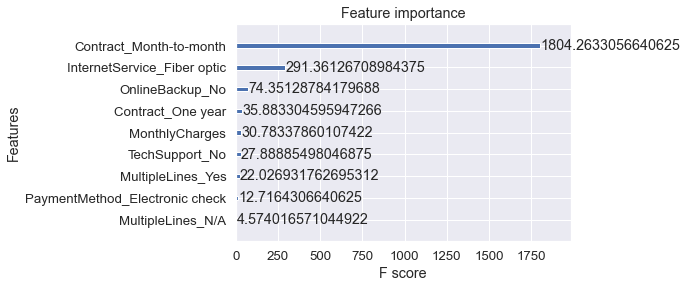

In [71]:
xgb.plot_importance(xgbclf, importance_type = 'gain')

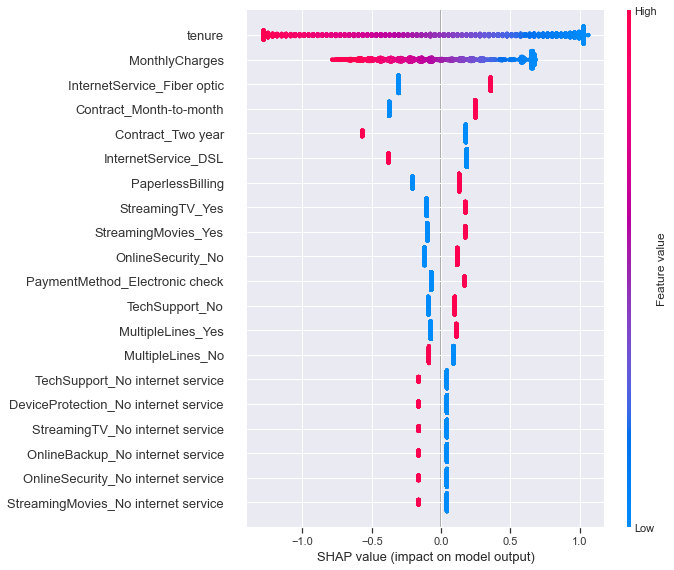

In [72]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

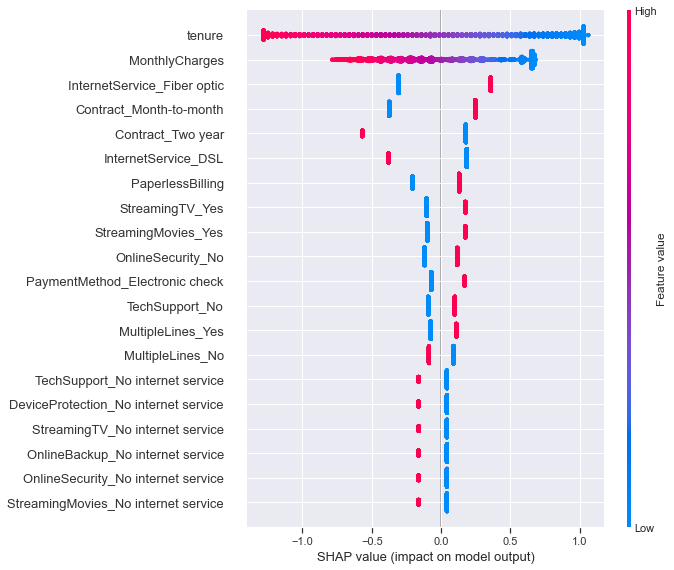

In [73]:
shap.summary_plot(shap_values, X_train)

In [74]:
shap_values = shap.TreeExplainer(xgbclf).shap_values(X_train),
shap_values = shap.TreeExplainer(xgbclf).shap_values(X_test)

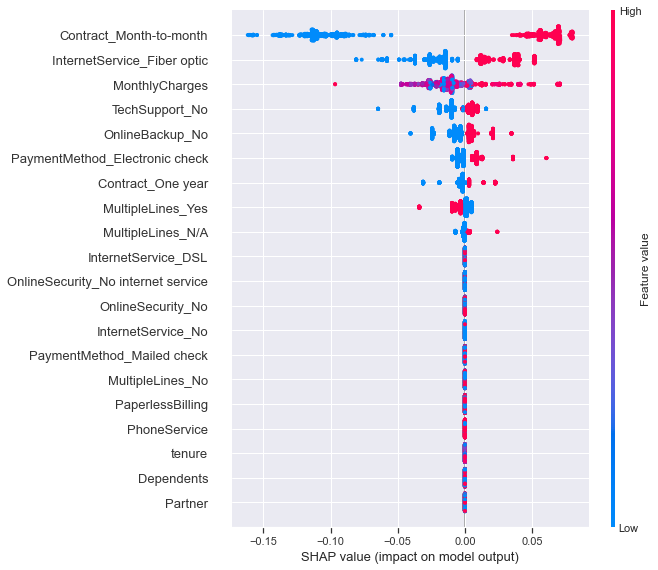

In [75]:
shap.summary_plot(shap_values, X_test)

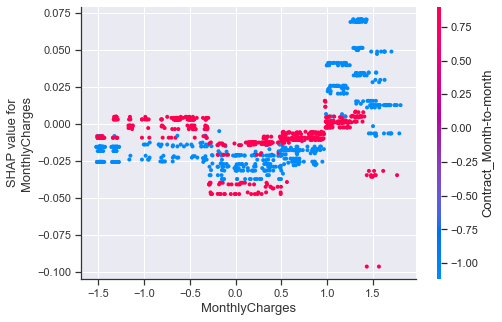

In [76]:
shap.dependence_plot("MonthlyCharges", shap_values, X_test)

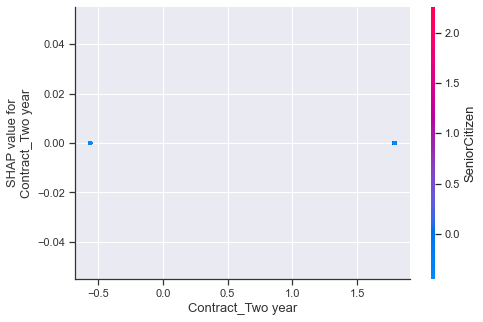

In [77]:
# setting show=False allows us to continue customizing the matplotlib plot before displaying it
shap.dependence_plot("Contract_Two year", shap_values, X_test, show=True)

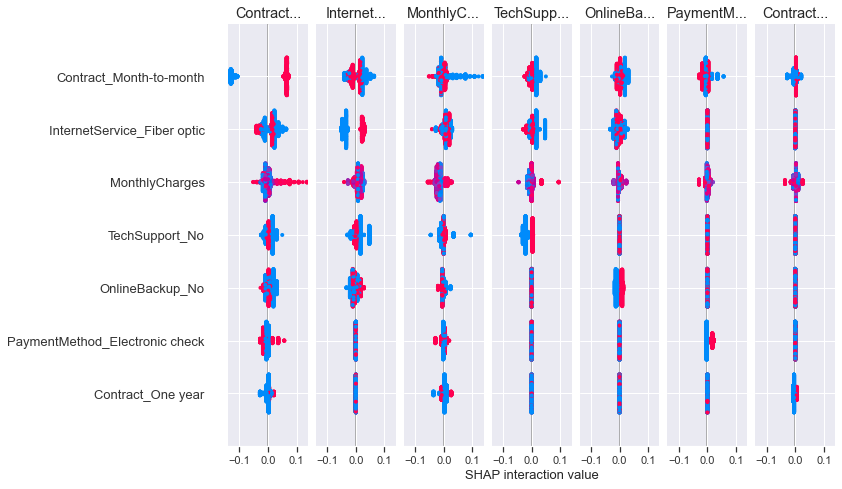

In [78]:
shap_interaction_values = shap.TreeExplainer(xgbclf).shap_interaction_values(X_test.iloc[:2000,:])
shap.summary_plot(shap_interaction_values, X_test.iloc[:2000,:])

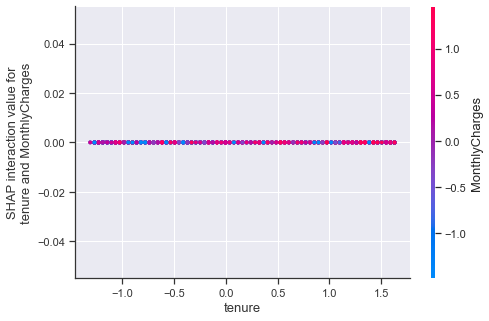

In [79]:
shap.dependence_plot(
    ("tenure", "MonthlyCharges"),
    shap_interaction_values, X_test.iloc[:2000,:],
    display_features=X_test.iloc[:2000,:]
)

In [80]:
# APPLYING SHAPLEY TO THIS MODELING
shap.initjs()
%time explainer = shap.TreeExplainer(xgbclf)
shap_values = explainer.shap_values(X_test)

Wall time: 2.99 ms


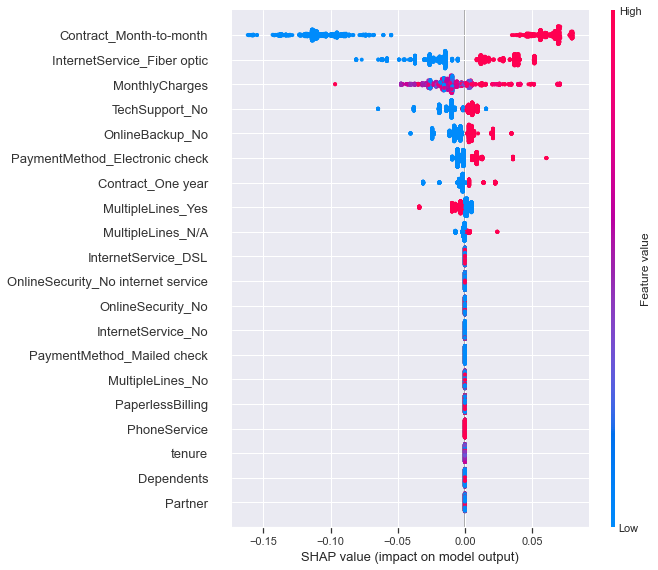

In [81]:
shap.summary_plot(shap_values, X_test)

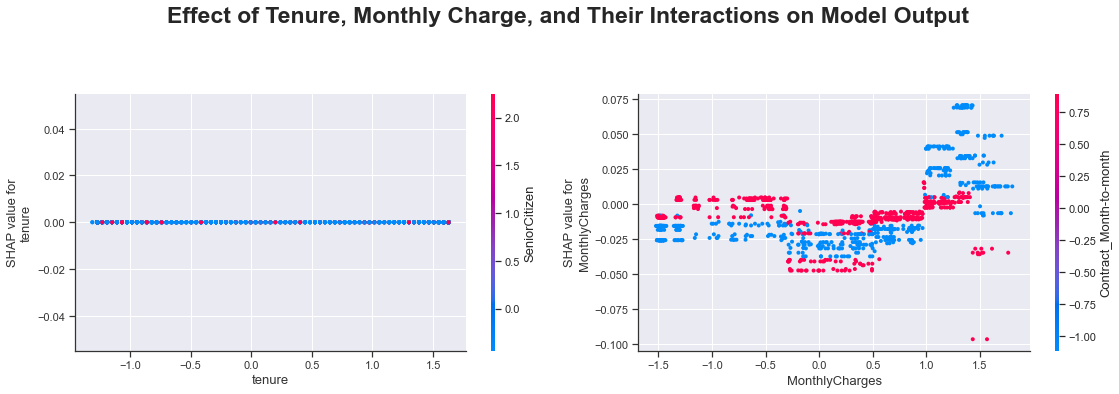

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), sharex=False, sharey=False)
fig.suptitle('Effect of Tenure, Monthly Charge, and Their Interactions on Model Output', 
             y=1.1, fontsize=23, fontweight='bold')

#Create graph showing effect of 'tenure' on model output
tenure_dependencePlot = shap.dependence_plot('tenure', shap_values, X_test, 
                                            ax=axes[0], show=False)

#Create graph showing effect of 'MonthlyCharges' on model output
monthlyCharges_dependencePlot = shap.dependence_plot('MonthlyCharges', shap_values, X_test, 
                                                     ax=axes[1], show=False)

plt.tight_layout()

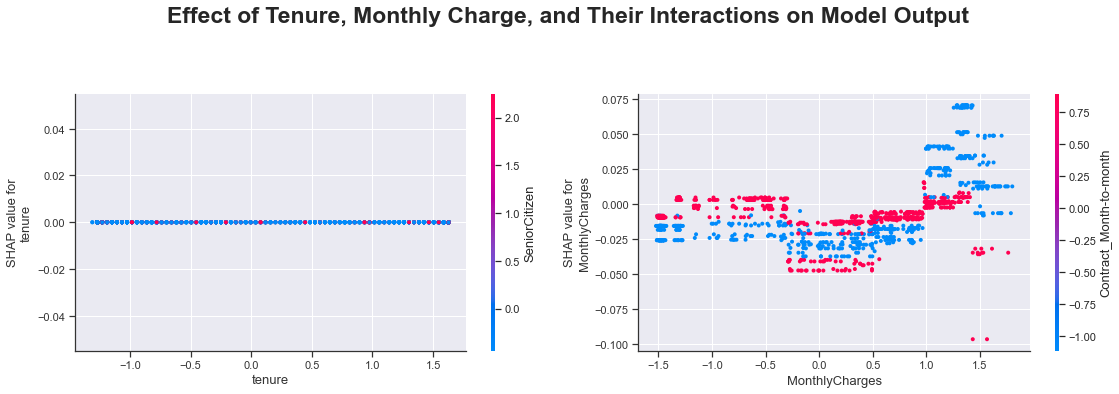

In [83]:
# Shap demonstrations of Effects of Tenure, Monthly Charge, and their interactions on model output
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), sharex=False, sharey=False)
fig.suptitle('Effect of Tenure, Monthly Charge, and Their Interactions on Model Output', 
             y=1.1, fontsize=23, fontweight='bold')

# Create graph showing effect of 'tenure' on model output
tenure_dependencePlot = shap.dependence_plot('tenure', shap_values, X_test, 
                                             ax=axes[0], show=False)

# Create graph showing effect of 'MonthlyCharges' on model output
monthlyCharges_dependencePlot = shap.dependence_plot('MonthlyCharges', shap_values, X_test, 
                                                    ax=axes[1], show=False)

plt.tight_layout()

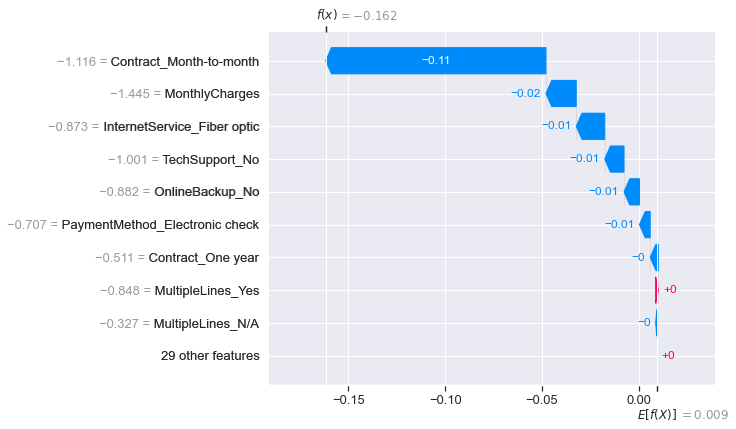

In [84]:
#Get shap values
explainer = shap.TreeExplainer(xgbclf)
shap_values = explainer(X_test)

# Interaction waterfall
shap.plots.waterfall(shap_values[0])

In [85]:
# Interaction waterfall
shap.plots.force(shap_values[0])

In [86]:
# Interaction waterfall
shap.plots.force(shap_values[1])

In [87]:
# beeswarm groups
shap_values_1 = explainer(X_test)
shap_values_0 = explainer(X_test)

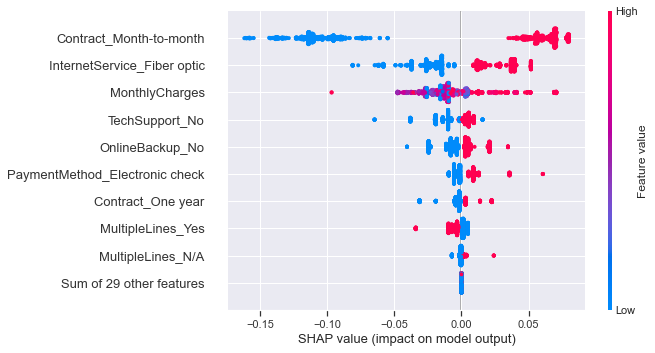

In [88]:
#Get order of features in SHAP plot for postive target variable
shap_mean = np.abs(shap_values_1.values).mean(0)
order = range(len(shap_mean))
order = [x for _,x in sorted(zip(shap_mean,order),reverse=True)]

shap.plots.beeswarm(shap_values_0,order = order)

##          RANDOM FOREST CLASSIFIER APPLIED IN TELCO CHURN PREDICTION MODEL

In [89]:
# RANDOM FOREST CLASSIFIER
# INSTANTIATE THE RANDOM FOREST CLASSIFIER
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000, n_features = 4,
                         n_informative = 2, n_redundant = 0,
                         random_state = 0, shuffle = False)
rfc = RandomForestClassifier(random_state = None)

# PERFORM FITTING TO THE MODEL AND OBTAIN THE MODEL SCORES
rfc.fit(X_train, y_train)
score = rfc.score(X_train, y_train)
score_a = rfc.score(X_test, y_test)
print("TRAINING SET ACCURACY: ", '%.3f' %(score))
print("TEST SET ACCURACY: ", '%.3f' %(score_a))

TRAINING SET ACCURACY:  0.996
TEST SET ACCURACY:  0.775


In [90]:
# NEXT IS TO DETERMINE CHURN PREDICTION
rfc_predictions = rfc.predict(X_test)
rfc_probs = rfc.predict_proba(X_test)
print(rfc_predictions), print(rfc_probs)

[0 0 1 ... 0 0 1]
[[1.   0.  ]
 [0.84 0.16]
 [0.11 0.89]
 ...
 [0.99 0.01]
 [0.64 0.36]
 [0.28 0.72]]


(None, None)

In [91]:
# LETS TAKE A LOOK AT THE MODEL EVALUATIONS USING ACCURACY PRECISION, RECALL AND F1 SCORE
acc = accuracy_score(y_test, rfc_predictions)
prec = precision_score(y_test, rfc_predictions)
rec = recall_score(y_test, rfc_predictions)
f1 = f1_score(y_test, rfc_predictions)
f2 = fbeta_score(y_test, rfc_predictions, beta = 2.0)

evaluation = pd.DataFrame([['Random Forest Classifier', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall',
                                                                                      'F1 Score', 'F2 Score'])
evaluation = evaluation.sort_values(['Precision', 'Recall', 'F2 Score'], ascending = False)
print(evaluation)

                      Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest Classifier  0.775018   0.601423  0.451872  0.516031  0.475521


In [92]:
# APPLYING K-FOLD CROSS VALIDATION THAT CAN CONFIRM MODEL VARIANCE
rfc_accuracies = cross_val_score(rfc,
                                  X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy:, % 0.2f (+/- %0.2f)" % (rfc_accuracies.mean(), rfc_accuracies.std()* 2))

Random Forest Classifier Accuracy:,  0.78 (+/- 0.03)


Test Data Accuracy: 0.7750


<Figure size 2304x1728 with 0 Axes>

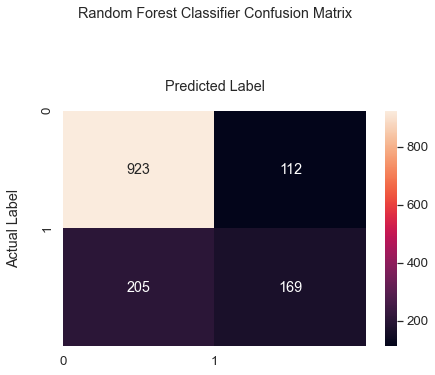

In [93]:
# CONFUSION MATRIX CALCULATION
cmx = confusion_matrix(y_test, rfc_predictions)
cmx_df = pd.DataFrame(cmx, index = (0,1), columns = (0,1))
plt.figure(figsize = (32, 24))
fig, ax = plt.subplots()
sn.set(font_scale = 1.2)
sn.heatmap(cmx_df, annot = True, fmt = 'g'#, cmap = "YlGnBu"
          )
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Random Forest Classifier Confusion Matrix\n', y = 1.3)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel("Actual Label\n")
plt.xlabel("Predicted Label\n")
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, rfc_predictions))

In [94]:
print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test, rfc_predictions))
print(accuracy_score(y_test, rfc_predictions))

[[923 112]
 [205 169]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.45      0.52       374

    accuracy                           0.78      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.78      0.76      1409

0.7750177430801988


No Skill: ROC AUC = 0.500
RFC: ROC AUC =  0.814


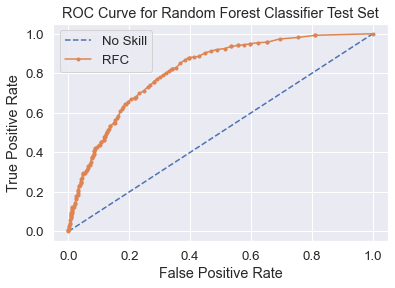

In [95]:
#ROC CURVE() AND AUC FUNCTION FOR RANDOM FOREST CLASSIFIER MODEL
# Generate a No Skill Prediction
ns_probs = [0 for e in range(len(y_test))]
# Probabilities for predicted values
rfc_probs = rfc.predict_proba(X_test)

# Retaining only the probabilities of the positive prediction
rfc_probs = rfc_probs[:,1]

#Scores Calculation
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)

# Summarizing Scores
print('No Skill: ROC AUC = %.3f' % (ns_auc))
print('RFC: ROC AUC = % .3f' % (rfc_auc))

# find the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

# Plotting the ROC Curve for the Model
plt.plot(ns_fpr, ns_tpr, linestyle = 'dashed', label = 'No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker = '.', label = 'RFC')
plt.title('ROC Curve for Random Forest Classifier Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC = 0.500
RFC: ROC AUC =  1.000


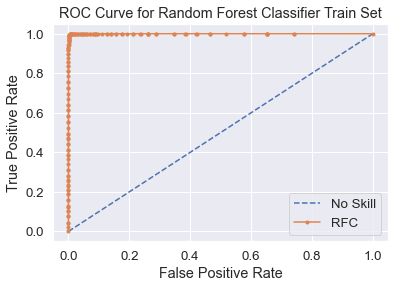

In [96]:
ns_probs = [0 for e in range(len(y_train))]
# Probabilities for predicted values
rfc_probs = rfc.predict_proba(X_train)

# Retaining only the probabilities of the positive prediction
rfc_probs = rfc_probs[:,1]

#Scores Calculation
ns_auc = roc_auc_score(y_train, ns_probs)
rfc_auc = roc_auc_score(y_train, rfc_probs)

# Summarizing Scores
print('No Skill: ROC AUC = %.3f' % (ns_auc))
print('RFC: ROC AUC = % .3f' % (rfc_auc))

# find the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_train, rfc_probs)

# Plotting the ROC Curve for the Model
plt.plot(ns_fpr, ns_tpr, linestyle = 'dashed', label = 'No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker = '.', label = 'RFC')
plt.title('ROC Curve for Random Forest Classifier Train Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [97]:
# FINE TUNING RANDOM FOREST CLASSIFIER MODEL WITH HYPERPARAMETER TUNING
#HYPERPARAMETER TUNING OF RANDOM FOREST CLASSIFIER
# GRIDSEARCH Cv METHOD; STAGE1
grid = {'bootstrap':[True], 
        'ccp_alpha': [0.0], 
        'class_weight' : ['balanced', 'balanced_subsample'],
        'criterion' : ["gini", "entropy"], 
        'max_depth': [None], 
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_leaf_nodes' :[None],
        'max_samples': [None],
        'min_impurity_decrease':[0.0],
        'min_samples_leaf': [1],
        'min_samples_split': [2],
        'min_weight_fraction_leaf':[0.0], 
        'n_estimators':[100],
        'n_jobs':[None],
        'oob_score':[False], 
        'random_state': [0],
        'verbose':[0], 
        'warm_start':[False]
        }
grid_search = GridSearchCV(estimator = rfc, param_grid = grid,
                          cv = 5)
grid_result = grid_search.fit(X_train, y_train)
# Summary results
rfc_best_accuracy = grid_result.best_score_
rfc_best_parameters = grid_result.best_params_
rfc_best_accuracy, rfc_best_parameters

(0.7857606213386583,
 {'bootstrap': True,
  'ccp_alpha': 0.0,
  'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'log2',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': 0,
  'verbose': 0,
  'warm_start': False})

In [98]:
# STAGE2:
import time
# ASSIGN REGULARIZATION HYPERPARAMETER VALUE
# SUM THE ABOVE
parameters = dict(bootstrap = [True],
  ccp_alpha = [0.0],
  class_weight = ['balanced_subsample'],
  criterion = ['gini'],
  max_depth = [None],
  max_features = ['auto'],
  max_leaf_nodes = [None],
  max_samples = [None],
  min_impurity_decrease =[0.0],
  min_samples_leaf  = [1],
  min_samples_split  = [2],
  min_weight_fraction_leaf  =[0.0],
  n_estimators  = [100],
  n_jobs =[None],
  oob_score = [False],
  random_state = [0],
  verbose = [0],
  warm_start = [False])
grid_search = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 5,
                           n_jobs = -1)
t0 = time.time()
grid_result  = grid_search .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
rfc_best_accuracy = grid_result.best_score_
rfc_best_parameters = grid_result.best_params_
rfc_best_accuracy, rfc_best_parameters

Took 5.51 seconds


(0.6848143100495763,
 {'bootstrap': True,
  'ccp_alpha': 0.0,
  'class_weight': 'balanced_subsample',
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 'auto',
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': 0,
  'verbose': 0,
  'warm_start': False})

In [99]:
# HYPERPARAMETER TUNING RANDOM FOREST CLASSIFIER
rfc = RandomForestClassifier(random_state = 0, criterion = 'gini')
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred_r = rfc.predict(X_test)
#probability score
y_pred_probs = rfc.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
y_pred_probs

array([0.  , 0.19, 0.99, ..., 0.02, 0.36, 0.77])

Test Data Accuracy: 0.7800


<Figure size 1728x1152 with 0 Axes>

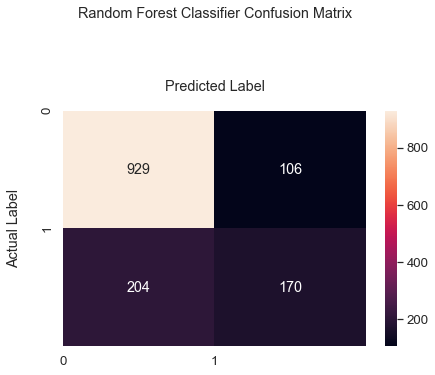

In [100]:
# APPLYING CONFUSION MATRIX TO CONTRAST PREDICTIONS WITH TEST SET
confusmatrix2 = confusion_matrix(y_test, y_pred_r)
confusmatrix2
# Confusion Matrix as a crosstab
pd.crosstab(np.array(y_test), np.array(pd.Series(y_pred_r)), rownames = ['ACTUAL'], colnames = ['PRED'], margins = True)
# Let visualize the confusion matrix
confusmatrix2_df = pd.DataFrame(confusmatrix2, index = (0,1), columns = (0,1))
plt.figure(figsize = (24, 16))

fig, ax = plt.subplots()
sn.set(font_scale = 1.2)
sn.heatmap(confusmatrix2_df, annot = True, fmt = 'g'#, cmap = "YlGnBu"
          )
class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Random Forest Classifier Confusion Matrix\n', y = 1.3)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel("Actual Label\n")
plt.xlabel("Predicted Label\n")

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred_r))

In [101]:
# CREATE A DATAFRAME BASED ON THE RESULTS OF PREDICTIONS
rfc_results = pd.concat([test_identity, y_test], axis = 1).dropna()
rfc_results['predictions'] = y_pred_r
rfc_results["propensity_to_churn(%)"] = y_pred_probs
rfc_results["propensity_to_churn(%)"] = rfc_results["propensity_to_churn(%)"]*100
rfc_results["propensity_to_churn(%)"] = rfc_results["propensity_to_churn(%)"].round(2)
rfc_results = rfc_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
rfc_results ['Ranking'] = pd.qcut(rfc_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (rfc_results.head(30))

      customerID  Churn  predictions  propensity_to_churn(%) Ranking
5532  8174-LNWMW      0            0                     0.0      10
5173  2480-SQIOB      0            0                    19.0       5
7010  0723-DRCLG      1            1                    99.0       1
6507  5708-EVONK      1            0                     8.0       7
5985  3585-YNADK      0            0                     5.0       8
5636  0601-WZHJF      1            0                    45.0       3
6667  0872-NXJYS      1            1                    74.0       1
6501  4753-PADAS      0            0                     8.0       7
2367  0235-KGSLC      1            1                    63.0       2
1018  3748-FVMZZ      0            1                    67.0       2
6002  3727-RJMEO      1            0                    49.0       3
1354  9415-DPEWS      1            1                    79.0       1
6225  1452-UZOSF      0            0                     1.0       9
5038  4815-TUMEQ      0           

In [102]:
# APPLYING SHAPLEY TO THIS MODELING
shap.initjs()
%time explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_test)

Wall time: 171 ms


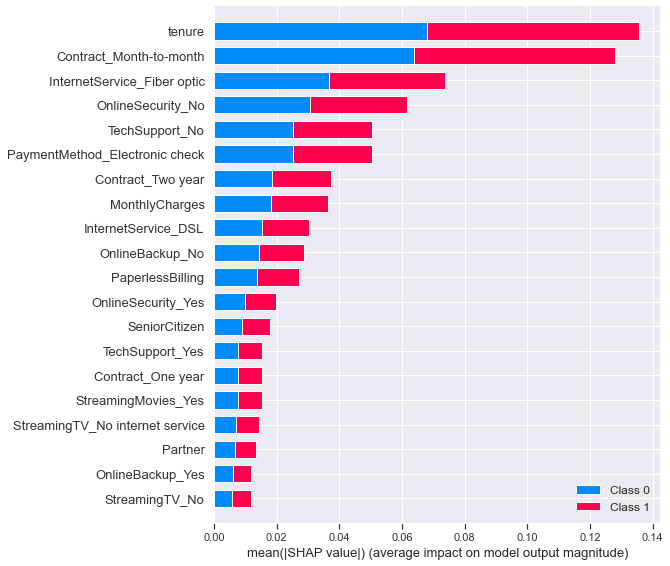

In [103]:
shap.summary_plot(shap_values, X_train) # plot_type="bar"

In [104]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

[0.02662931 0.02924211 0.02376109 0.21833435 0.00407213 0.03109744
 0.22134321 0.00390459 0.01429558 0.01422298 0.0113889  0.02905042
 0.00150799 0.03419973 0.00158655 0.01284926 0.02130386 0.00193899
 0.01379475 0.01508607 0.00058994 0.0137054  0.02957535 0.00133357
 0.01182726 0.01288793 0.0050874  0.0118696  0.01210158 0.00200175
 0.01285405 0.05822679 0.0113663  0.01351343 0.01382504 0.0152494
 0.03131028 0.01306563]


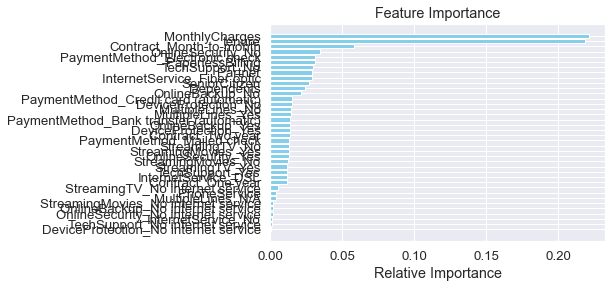

In [105]:
print(rfc.feature_importances_)
importances = rfc.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], color = 'skyblue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [106]:
explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_test)

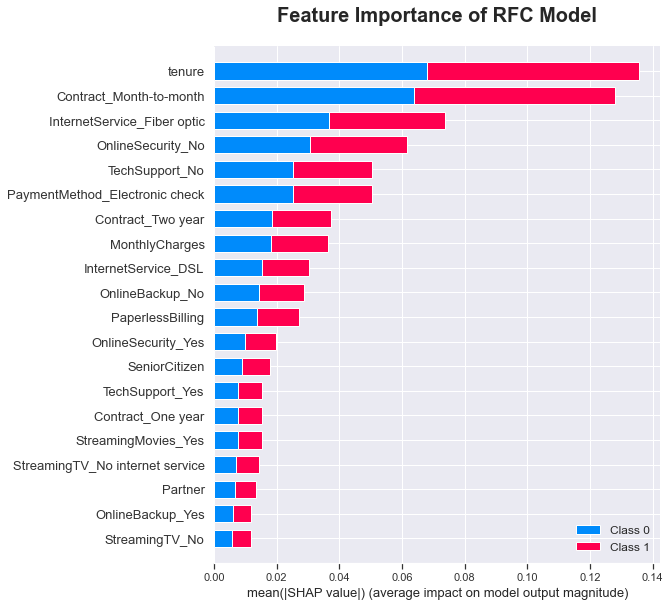

In [107]:
# Plot feature importance of RFC 
plt.figure()
plt.title('Feature Importance of RFC Model', pad = 25, fontsize = 20, fontweight ="bold")
shap.summary_plot(shap_values, X_test, plot_type = 'bar')

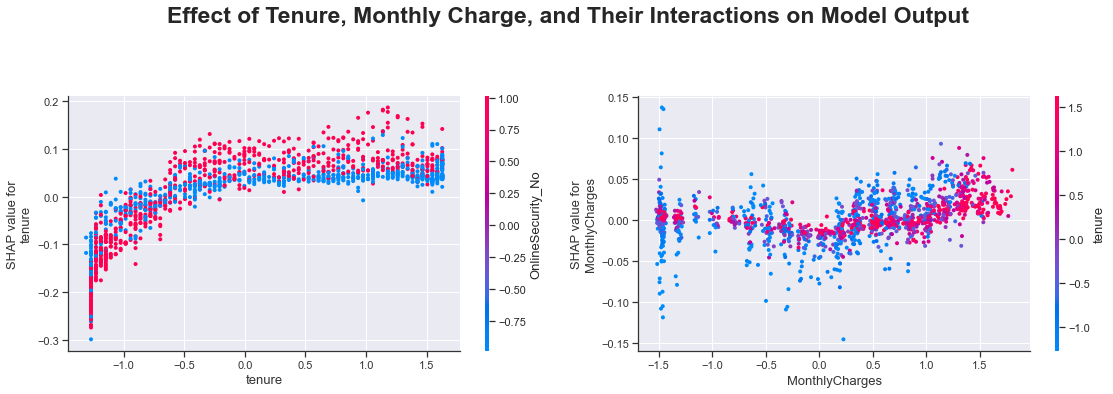

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), sharex=False, sharey=False)
fig.suptitle('Effect of Tenure, Monthly Charge, and Their Interactions on Model Output', 
             y=1.1, fontsize=23, fontweight='bold')

# Create graph showing effect of 'tenure' on model output
tenure_dependencePlot = shap.dependence_plot('tenure', shap_values[0], X_test, 
                                             ax=axes[0], show=False)

# Create graph showing effect of 'MonthlyCharges' on model output
monthlyCharges_dependencePlot = shap.dependence_plot('MonthlyCharges', shap_values[1], X_test, 
                                                     ax=axes[1], show=False)

plt.tight_layout()

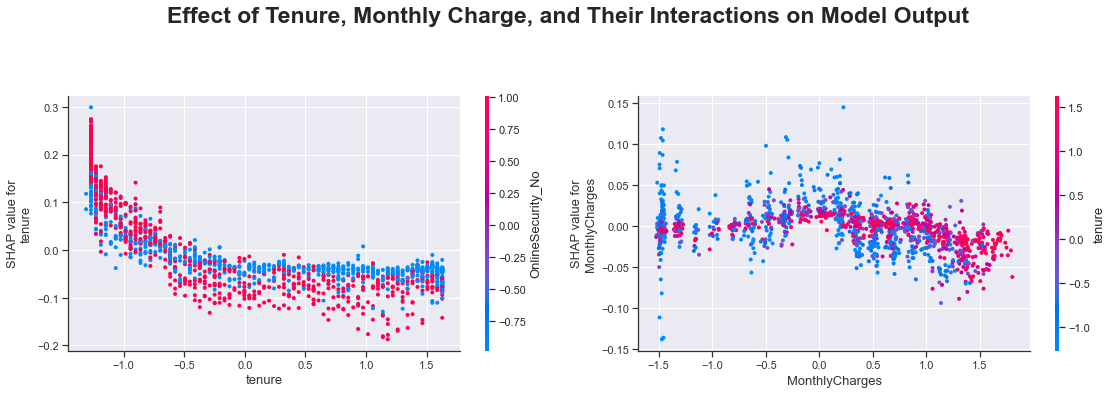

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), sharex=False, sharey=False)
fig.suptitle('Effect of Tenure, Monthly Charge, and Their Interactions on Model Output', 
             y=1.1, fontsize=23, fontweight='bold')

# Create graph showing effect of 'tenure' on model output
tenure_dependencePlot = shap.dependence_plot('tenure', shap_values[1], X_test, 
                                             ax=axes[0], show=False)

# Create graph showing effect of 'MonthlyCharges' on model output
monthlyCharges_dependencePlot = shap.dependence_plot('MonthlyCharges', shap_values[0], X_test, 
                                                     ax=axes[1], show=False)

plt.tight_layout()

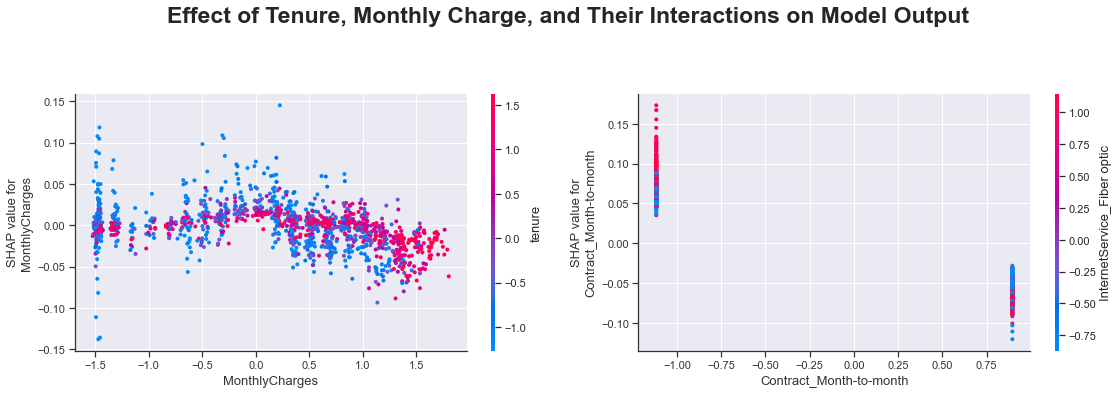

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), sharex=False, sharey=False)
fig.suptitle('Effect of Tenure, Monthly Charge, and Their Interactions on Model Output', 
             y=1.1, fontsize=23, fontweight='bold')

# Create graph showing effect of 'tenure' on model output
monthlycharges_dependencePlot = shap.dependence_plot('MonthlyCharges', shap_values[0], X_test, 
                                             ax=axes[0], show=False)

# Create graph showing effect of 'MonthlyCharges' on model output
contractmonthtomonth_dependencePlot = shap.dependence_plot('Contract_Month-to-month', shap_values[0], X_test, 
                                                     ax=axes[1], show=False)

plt.tight_layout()

# <center> CONCLUSION </center>
## <p> Three Machine Learning Algorithms were utilized in this prediction of telco customer churns. Logistic Regression, Random Forest Classifier and Extreme Gradient Boosting Classifier were employed. The purpose was to predict customers that would churn and which of these Algorithms would be best to predict the exact number of customer churns. Logistic Regression predicted 29 percent customer  churn for the train set whie 71 percent were non-churn for the set within the period of their contract.
## The Logistic Regression predicted 72 percent non-churn and 28 percent churn for the Test data set. And has evaluation Accuracy of 72 percent and 70 percent accuracy based on the cross val score. The ROC AUC for the model Logistic Regression were 0.841 for train set and 0.846 for the test set. The XGBoost Classifier shows 0.822 for training set accuracy and 0.793 for test set. This classifier has ROC AUC of 0.876, and is an indication of test data accurracy improvement after hyperparameter tuning with GridSearchCV. The implication is that more churn customers were predicted than in the previous prediction (751 non-churn and 284 possible churns). There are other hyperparameter tuning methods that can increase the performance of XGBoost Classifier. This includes RandomizedSearchCV and HyperbandSearchCV. For the Random Forest Classifier, the algorithm demonstrated training set accuracy of 0.997, and test set accuracy of 0.781, and a cross val score of 0.79 +/- 0.03; and the the ROC AUC for the test set was 0.816 and 1.00 for the training set. Applying the Confusion Matrix, after hyperparameter tuning, the test data accuracy becomes 0.77 resulting in less prediction of customers churn. (1) XGBoost Classifier: ROC AUC = 0.876, (2) Logistic Regression: ROC AUC = 0.841, (3) Random Forest Classifier: ROC AUC = 0.816. Based on the above results, XGBoost Classifier model is presented to the organisation customer retention group in order to restrategize their business program. This would be an avenue for the organisation to target those customers with high propensity to churn. It's possible that this would help the organisation to enjoy increased revenues via its improved retention program or strategy.</p> 